<a href="https://colab.research.google.com/github/vivekmoningi/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem statement**:

The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. 

Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.


**Project Pipeline**:

* Data Understanding
* Exploratory data analytics (EDA)
* Train/Test split
* Model building / hyperparameter tuning
* Model evaluation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

#importing packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# importing power transformer package
from sklearn.preprocessing import PowerTransformer

#importing libraries
from sklearn.neighbors import KNeighborsClassifier

#importing package for Logistic Regression
from sklearn.linear_model import LogisticRegression

#importing necessary packages for Decision Trees
from sklearn.tree import DecisionTreeClassifier

# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Importing XGBoost
from xgboost import XGBClassifier

#importing metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix,f1_score,classification_report

#hyperparameter Turning
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV,RandomizedSearchCV



### Exploring Data

In [ ]:
# loading the data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")

In [ ]:
# checking the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#checking info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#shape of the file
data.shape

(284807, 31)

### Handling Null & Duplicate Values

In [ ]:
#checking null values 
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#checking duplicates
duplicates = data[data.duplicated()]
duplicates.shape

(1081, 31)

There are around 1081 duplicates in the data so will remove the duplicates data

In [ ]:
#removing duplicates
data.drop_duplicates(inplace=True)

In [ ]:
#shape of the data after removing duplicates
data.shape

(283726, 31)

In [ ]:
# checking number of class values and thier split
Classess = data['Class'].value_counts()
Normal_Transactions = round(Classess[0]/data['Class'].count()*100,4)
Fraudelent_Transactions = round(Classess[1]/data['Class'].count()*100,4)

In [ ]:
pattern = "#"*100

print(pattern)
print("Percentage of Normal Share i.e. Non-Fraudulent Transactions(%):\n"+ str(Normal_Transactions)+ " %"+ "\n\n"+ pattern)

print("Percentage of Fraud Share i.e. Fraudulent Transactions(%):\n"+ str(Fraudelent_Transactions) +" %"+ "\n\n"+ pattern)

####################################################################################################
Percentage of Normal Share i.e. Non-Fraudulent Transactions(%):
99.8333 %

####################################################################################################
Percentage of Fraud Share i.e. Fraudulent Transactions(%):
0.1667 %

####################################################################################################


As we saw above there are total of 492 values of 1's and 284315 0's in the whole data set which are around 0.17% of the whole data set. This states that data is imbalanced.

In [ ]:
#checking summary statistics of the data
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [ ]:
#comparing both values on class
data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [ ]:
#checking the columns in the data
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data.shape

(283726, 31)

### Exploratory Data Analysis

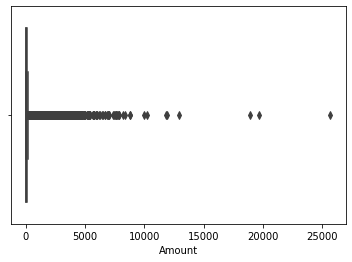

In [ ]:
# creating a box Plot to understand on the amount variables
sns.boxplot(x='Amount',data=data)

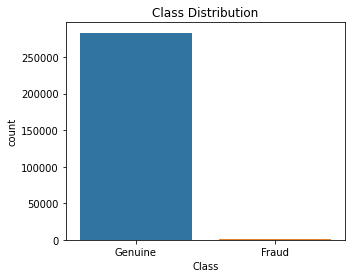

In [ ]:
# understanding on Class variables
Lables = ['Genuine','Fraud']
plt.figure(figsize=(5,4))
sns.countplot(data=data,x='Class')
plt.title('Class Distribution')
plt.xticks(range(2),Lables)
plt.show()

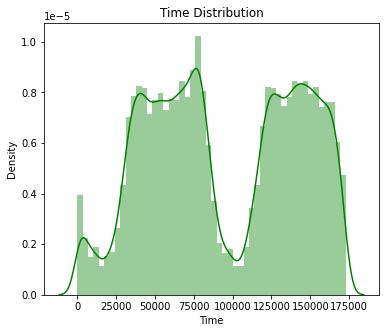

In [ ]:
#distribution of Time
plt.figure(figsize=(6,5))
plt.title('Time Distribution')
sns.distplot(data['Time'],color='green')

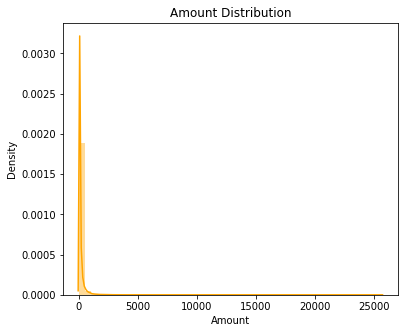

In [ ]:
#distribution of Amount
plt.figure(figsize=(6,5))
plt.title('Amount Distribution')
sns.distplot(data['Amount'],color='orange')

In [ ]:
#defining genuine and fraud
Genuine = data[data['Class']==0]
Fraud = data[data['Class']==1]

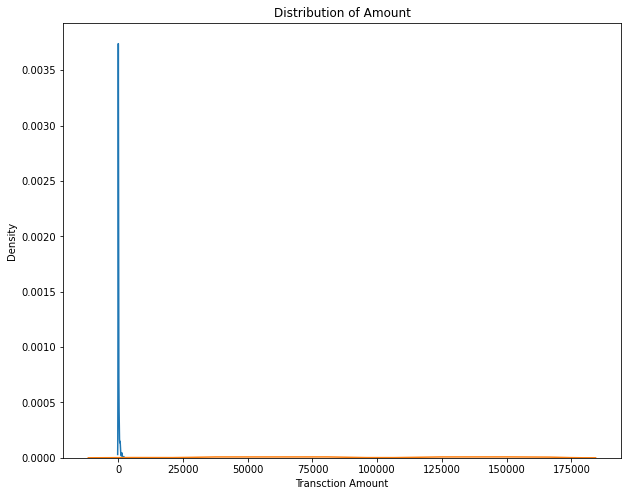

In [ ]:
#exploring the distribution of money with class label
plt.figure(figsize=(10,8))
ax = sns.distplot(Fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(Genuine['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.title('Distribution of Amount')
plt.show()

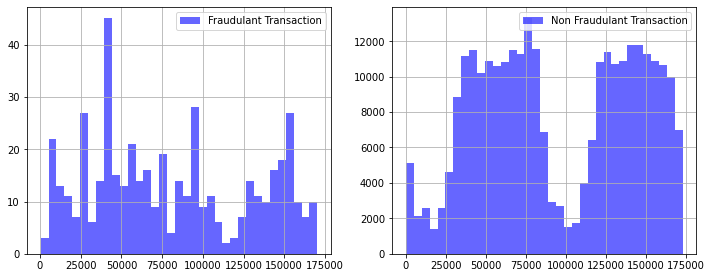

In [ ]:
#Fraud and Genuine Transactions distribution on Time
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
data[data.Class == 1].Time.hist(bins=35, color='blue', alpha=0.6, label="Fraudulant Transaction")
plt.legend()

plt.subplot(2, 2, 2)
data[data.Class == 0].Time.hist(bins=35, color='blue', alpha=0.6, label="Non Fraudulant Transaction")
plt.legend()

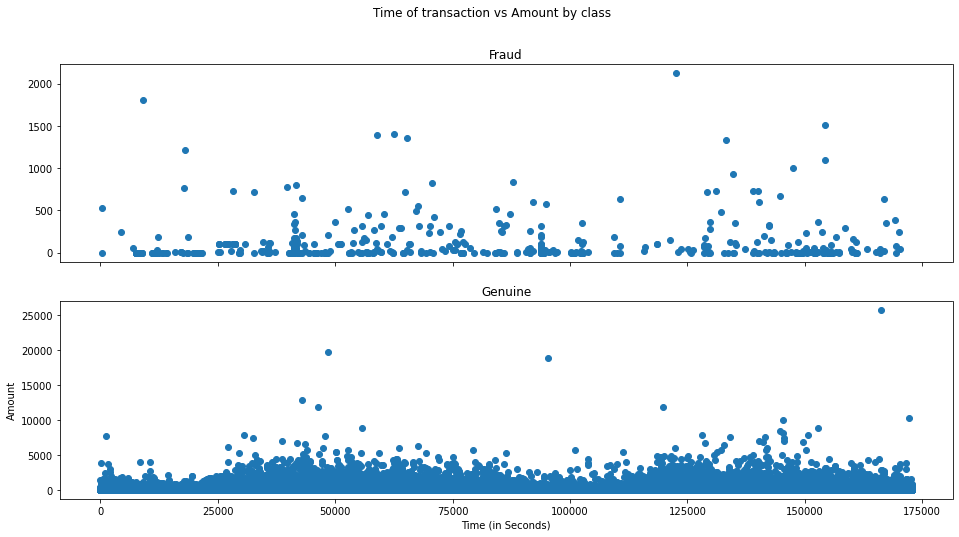

In [ ]:
rcParams['figure.figsize'] = 16, 8
f,(ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Genuine.Time, Genuine.Amount)
ax2.set_title('Genuine')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

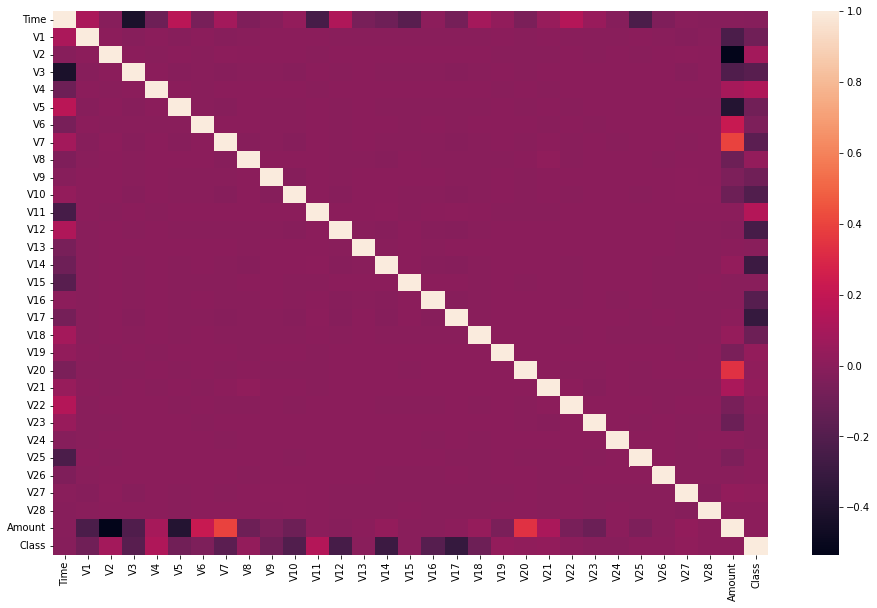

In [ ]:
# checking the correlation of data
plt.figure(figsize=(16,10))
corr = data.corr()
sns.heatmap(corr)

### Building Models

##### Train and Test data split

In [ ]:
#importing packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Creating X and Y variables
X = data.drop(['Class'],axis=1)
y = data['Class']

In [ ]:
# split the data into many variables
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42,stratify = y)

#scaling Time and Amount varaibles
scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [ ]:
print(f"TRAINING: X_train: {X_train.shape}, y_train: {y_train.shape}\n{'*'*55}")
print(f"TESTING: X_test: {X_test.shape}, y_test: {y_test.shape}")

TRAINING: X_train: (198608, 30), y_train: (198608,)
*******************************************************
TESTING: X_test: (85118, 30), y_test: (85118,)


<H3>Checking the Skweness of Data</h3>

In [ ]:
scaled_X_train = pd.DataFrame(X_train,columns=X.columns)
scaled_X_test = pd.DataFrame(X_test,columns=X.columns)
scaled_X_train.shape

(198608, 30)

In [ ]:
#fetching the columns of scaled data frame
columns = scaled_X_train.columns

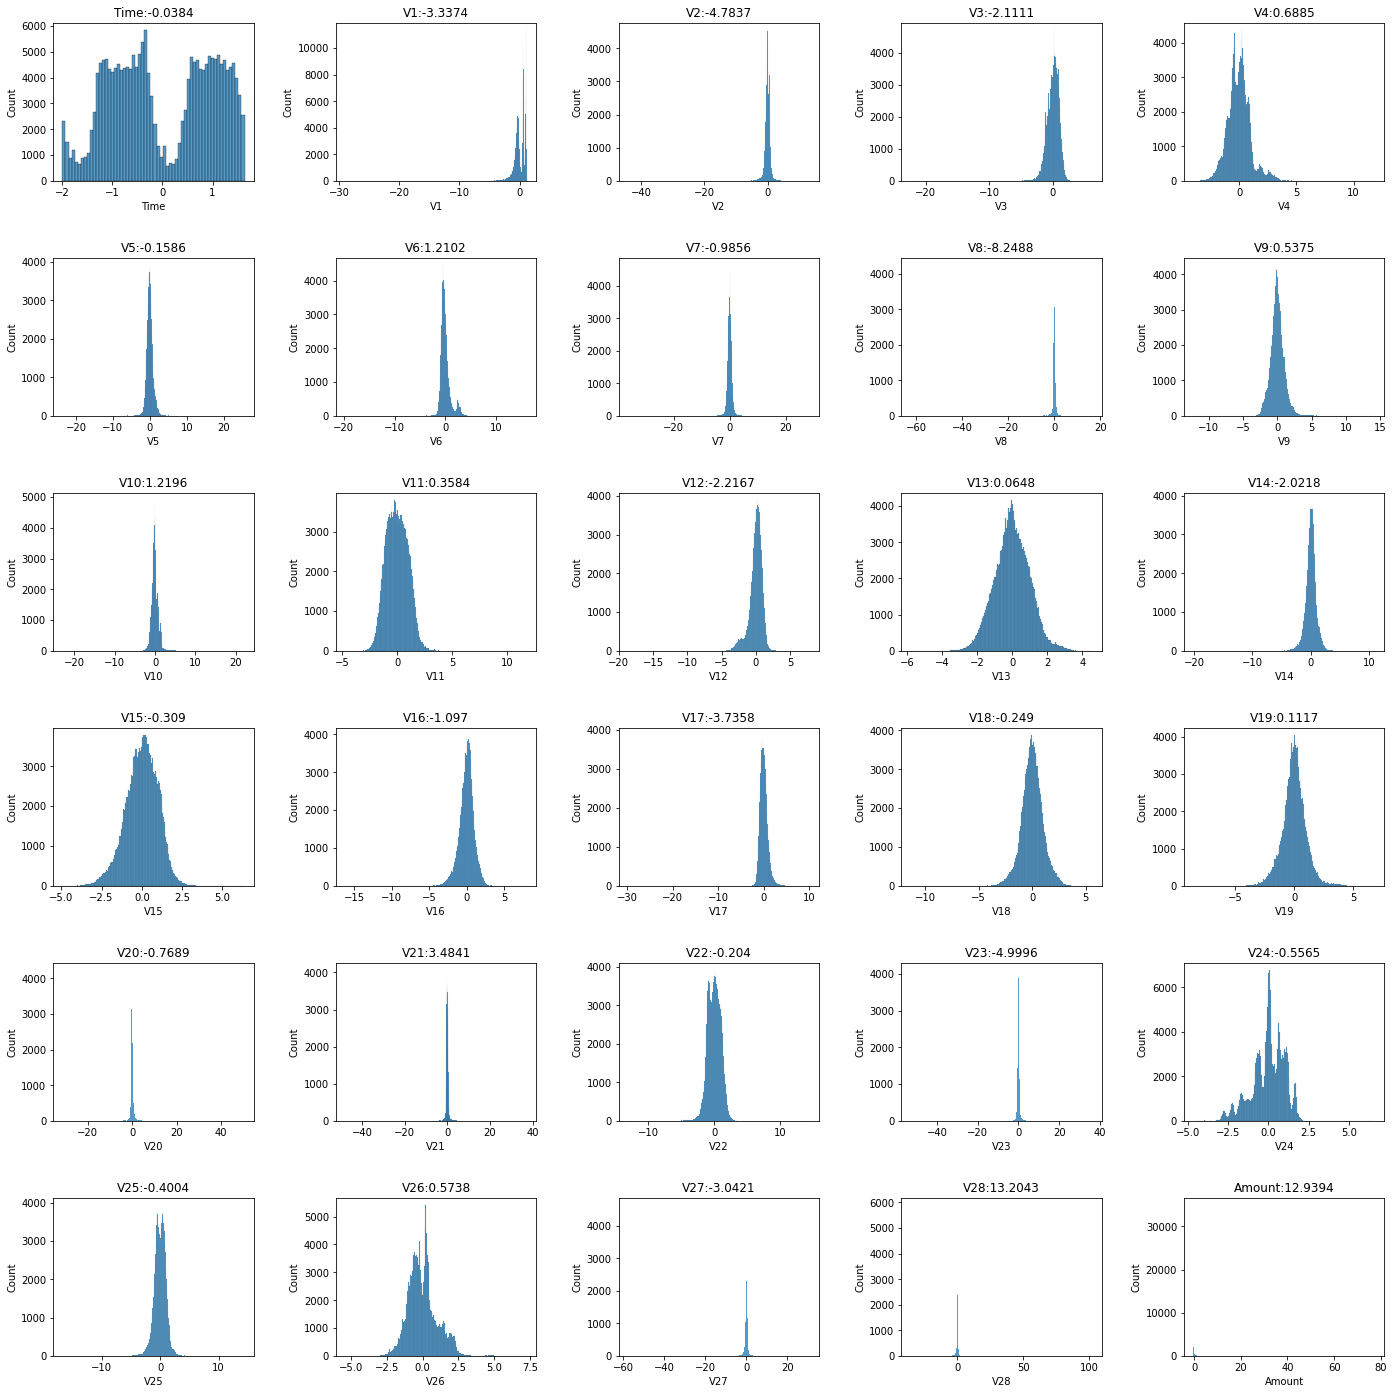

In [ ]:
# understanding other variables
i = 0
plt.figure(figsize=(20,20))
for col in columns:
    i+=1
    plt.subplot(6,5,i)
    sns.histplot(scaled_X_train[col])
    plt.title(col+':'+str(round(scaled_X_train[col].skew(),4)))
    plt.tight_layout(pad=3.0)
plt.show()

We have observed that there is skewness in many variables. We need to mitigate the skewness for bringing them into normal distribution.

<h3>Mitigating Skweness with Power Transformer

In [ ]:
# importing power transformer package
from sklearn.preprocessing import PowerTransformer

#intiating the powertransformer
pt = PowerTransformer(copy=False)

#Fit and Transform the PT on training data
X_train = pt.fit_transform(X_train)
#transforming X_test data on test data
X_test = pt.transform(X_test)

In [ ]:
# creating a dataframes for PowerTransformed for X_train and X_test 
X_train_pt_df = pd.DataFrame(data=X_train,columns = X.columns)
X_test_pt_df = pd.DataFrame(data=X_test,columns = X.columns)

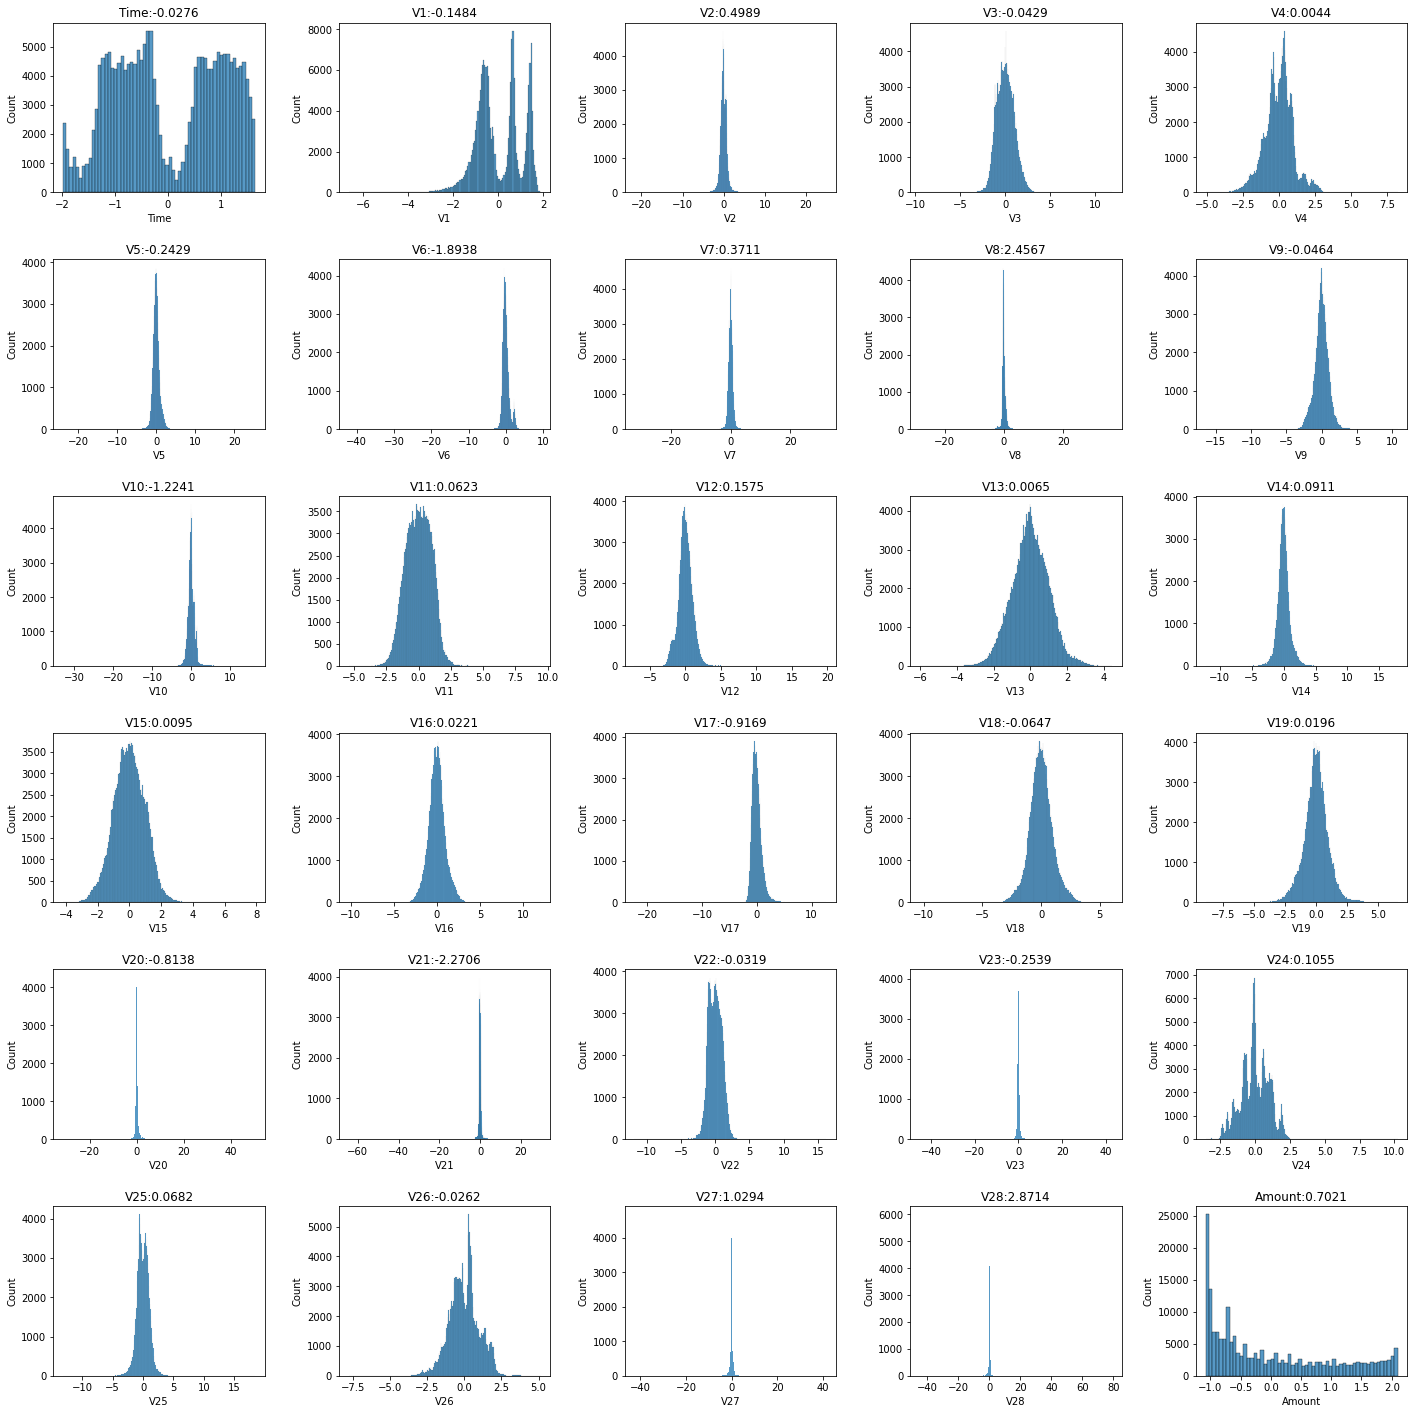

In [ ]:
#checking the visualization after skewness
i = 0
plt.figure(figsize=(20,20))
for col in columns:
    i+=1
    plt.subplot(6,5,i)
    sns.histplot(X_train_pt_df[col])
    plt.title(col+':'+str(round(X_train_pt_df[col].skew(),4)))
    plt.tight_layout(pad=2.0)
plt.show()

<h3> Model building for heavily imbalanced data </h3>

As we have seen data is heavily imbalances with 98% of data is of class 0 and 0.17% is of class 1 so due to which there is high possibility for the model to train and show 0 still the accuracy of model is high as we are dealing with highly imbalanced data considering these factors we should not take accuracy as deciding factor.

Then how we can predict better performing model so we need to consider the parameters that uses threshold as factor like confusion metrics etc but using ROC-AUC score is best and fair evalution for the model as it measure using all thresholds. The best threshold would be one at which TPR is high and FPR is low. After determining the optimal threshold we can calculate F1 Score of the classifier at selected threshold.

##### Model 1:

In [ ]:
#importing package for Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
#importing metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix,f1_score,classification_report

#hyperparameter Turning
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV,RandomizedSearchCV

In [ ]:
#creating Kfolds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000],"solver":['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear']}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1) 

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga',
                                    'liblinear']},
             scoring='roc_auc', verbose=1)

In [ ]:
#results of grid search cv
cv_results_lr = pd.DataFrame(model_cv.cv_results_)
cv_results_lr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.067559,0.156346,0.018614,0.001355,0.01,newton-cg,"{'C': 0.01, 'solver': 'newton-cg'}",0.986827,0.968993,0.984710,...,0.984084,0.007841,9,0.986965,0.989676,0.985751,0.986051,0.985748,0.986838,0.001487
1,0.372343,0.029609,0.017571,0.001151,0.01,lbfgs,"{'C': 0.01, 'solver': 'lbfgs'}",0.986826,0.968991,0.984712,...,0.984084,0.007841,10,0.986966,0.989677,0.985751,0.986051,0.985748,0.986839,0.001488
2,7.605286,0.174412,0.017052,0.000152,0.01,sag,"{'C': 0.01, 'solver': 'sag'}",0.986871,0.969062,0.984628,...,0.984112,0.007830,8,0.986970,0.989687,0.985793,0.986054,0.985746,0.986850,0.001485
3,8.442307,0.071154,0.017086,0.000163,0.01,saga,"{'C': 0.01, 'solver': 'saga'}",0.987045,0.969309,0.984236,...,0.984252,0.007837,2,0.986912,0.989679,0.985938,0.985991,0.985667,0.986838,0.001482
4,0.768830,0.072252,0.017160,0.000340,0.01,liblinear,"{'C': 0.01, 'solver': 'liblinear'}",0.986431,0.970730,0.984788,...,0.984513,0.007240,1,0.986327,0.989243,0.985539,0.985562,0.984969,0.986328,0.001520
5,1.128887,0.082318,0.017742,0.000649,0.1,newton-cg,"{'C': 0.1, 'solver': 'newton-cg'}",0.983153,0.966322,0.984505,...,0.982041,0.008171,18,0.985745,0.988821,0.983944,0.984538,0.985219,0.985654,0.001697
6,0.544566,0.033863,0.017158,0.000203,0.1,lbfgs,"{'C': 0.1, 'solver': 'lbfgs'}",0.983154,0.966321,0.984500,...,0.982041,0.008171,17,0.985744,0.988821,0.983944,0.984537,0.985219,0.985653,0.001697
7,7.986433,0.118263,0.017319,0.000264,0.1,sag,"{'C': 0.1, 'solver': 'sag'}",0.984654,0.968107,0.984495,...,0.983113,0.007822,12,0.986801,0.989538,0.985266,0.985524,0.985542,0.986534,0.001594
8,8.298454,0.093214,0.016972,0.000104,0.1,saga,"{'C': 0.1, 'solver': 'saga'}",0.985992,0.969729,0.984171,...,0.984227,0.007714,3,0.987465,0.990014,0.986499,0.986354,0.986033,0.987273,0.001451
9,1.004984,0.074970,0.017095,0.000200,0.1,liblinear,"{'C': 0.1, 'solver': 'liblinear'}",0.985260,0.969828,0.983810,...,0.984060,0.007690,11,0.987375,0.989931,0.986277,0.986203,0.986081,0.987174,0.001455


In [ ]:
# checking the best score model with better c
best_score_lr = model_cv.best_score_
best_C_lr = model_cv.best_params_['C']
best_solver_lr = model_cv.best_params_['solver']

#Print the result
print("the highest roc_auc score is {0} at C = {1} and solver is {2}".format(best_score_lr,best_C_lr,best_solver_lr))

the highest roc_auc score is 0.9845131735610956 at C = 0.01 and solver is liblinear


In [ ]:
# predicting the model with above metrics
lr_ib = LogisticRegression(C=best_C_lr,solver=best_solver_lr)

#fitting the model on train data

y_train_pred_lr = lr_ib.fit(X_train,y_train)

Prediction on Test data

In [ ]:
y_test_pred_lr = lr_ib.predict(X_test)

In [ ]:
# necessary evaluation metrics
def confusion_matrix_stats (y_test,y_test_pred):
    confusion_matrix = metrics.confusion_matrix(y_test,y_test_pred)
    print(confusion_matrix)
    print("\n")
    TP = confusion_matrix[1,1] #True Positive
    TN = confusion_matrix[0,0] #True Negatives
    FP = confusion_matrix[0,1] #False positives
    FN = confusion_matrix[1,0] #False negatives
    
    #Print necessary metrics like Accuracy, Sensitivity, Specificity and F1-Score
    print("#"*50)
    print("Accuracy:-",round(metrics.accuracy_score(y_test, y_test_pred),4))
    print("Sensitivity:-",round(TP / float(TP+FN),4))
    print("Specificity:-", round(TN / float(TN+FP),4))
    print("F1-Score:-", f1_score(y_test, y_test_pred))
    print("#"*50)
    print("\n")
    print("**********Classification Report**********")
    print(classification_report(y_test, y_test_pred))
    

In [ ]:
# confusion metrics and classification report 
confusion_matrix_stats(y_test,y_test_pred_lr)

[[84965    11]
 [   66    76]]


##################################################
Accuracy:- 0.9991
Sensitivity:- 0.5352
Specificity:- 0.9999
F1-Score:- 0.6637554585152838
##################################################


**********Classification Report**********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.87      0.54      0.66       142

    accuracy                           1.00     85118
   macro avg       0.94      0.77      0.83     85118
weighted avg       1.00      1.00      1.00     85118



In [ ]:
#prediction probability
y_test_pred_lr_prod = lr_ib.predict_proba(X_test)[:,1]

In [ ]:
# definning function roc_auc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

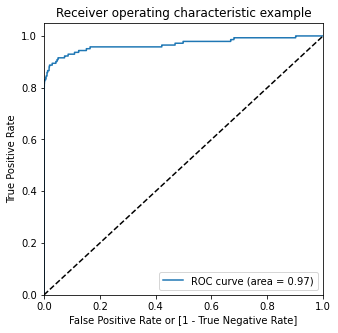

In [ ]:
#plot ROC Curve
draw_roc(y_test,y_test_pred_lr_prod)

As we can see that ROC on test data set is good which is 0.97

<H3>Decision Tree</H3>

In [ ]:
#importing necessary packages for Decision Trees
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#creating param grid 
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

param_grid = {
    'max_depth': range(3, 10, 1),
    'min_samples_leaf': [1,2,4,10,20,30],                 ## Hyperparameter: min_samples_leaf to be tuned
     'criterion': ['gini','entropy'],                                     
    'min_samples_split':[2,3,5,10,20,30,50]
}

#Initiating Decision Tree
DTree = DecisionTreeClassifier()

grid_search_dt = RandomizedSearchCV(estimator=DTree,
                              param_distributions=param_grid,
                              scoring='roc_auc',
                              cv=folds,
                              verbose=1)


#fitting the grid search to data
grid_search_dt.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(3, 10),
                                        'min_samples_leaf': [1, 2, 4, 10, 20,
                                                             30],
                                        'min_samples_split': [2, 3, 5, 10, 20,
                                                              30, 50]},
                   scoring='roc_auc', verbose=1)

In [ ]:
#cv results
cv_results_dt = pd.DataFrame(grid_search_dt.cv_results_)
cv_results_dt

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.872980,0.191799,0.018300,0.000430,3,10,9,entropy,"{'min_samples_split': 3, 'min_samples_leaf': 1...",0.940127,0.921564,0.912133,0.924608,0.011629,3
1,3.926176,0.097450,0.018023,0.000098,5,10,6,gini,"{'min_samples_split': 5, 'min_samples_leaf': 1...",0.921985,0.894346,0.924739,0.913690,0.013724,4
2,3.193691,0.076100,0.018933,0.000596,10,4,4,entropy,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.944077,0.916601,0.943208,0.934629,0.012752,2
3,3.252239,0.036055,0.017473,0.000366,50,1,5,gini,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.899903,0.930193,0.890727,0.906941,0.016863,7
4,3.947319,0.070011,0.032534,0.020063,3,1,6,gini,"{'min_samples_split': 3, 'min_samples_leaf': 1...",0.876648,0.849377,0.897520,0.874515,0.019712,9
5,5.789374,0.077313,0.018977,0.000187,3,10,9,gini,"{'min_samples_split': 3, 'min_samples_leaf': 1...",0.933053,0.880958,0.919110,0.911040,0.022020,5
6,3.268261,0.090112,0.017663,0.000188,3,1,5,gini,"{'min_samples_split': 3, 'min_samples_leaf': 1...",0.863659,0.858232,0.872614,0.864835,0.005930,10
7,3.936148,0.111219,0.018078,0.000091,20,4,6,gini,"{'min_samples_split': 20, 'min_samples_leaf': ...",0.921991,0.876389,0.924747,0.907709,0.022175,6
8,3.287324,0.092764,0.017648,0.000279,5,4,5,gini,"{'min_samples_split': 5, 'min_samples_leaf': 4...",0.890838,0.858459,0.908981,0.886093,0.020897,8
9,2.414395,0.092099,0.017508,0.000119,30,2,3,entropy,"{'min_samples_split': 30, 'min_samples_leaf': ...",0.949106,0.945954,0.943329,0.946130,0.002362,1


In [ ]:
#printing optimal score and hyperparameters
print("Best ROC AUC Score: ",grid_search_dt.best_score_)
print(grid_search_dt.best_estimator_)
best_estimator_dt = grid_search_dt.best_estimator_

Best ROC AUC Score:  0.946129665114217
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       min_samples_split=30)


In [ ]:
#Model with best estimators
dt_ib_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=3)

dt_ib_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=3)

In [ ]:
#Predicting on test data
y_train_pred_dt = dt_ib_model.predict(X_test)

In [ ]:
# confusion metrics and classification report 
confusion_matrix_stats(y_test,y_train_pred_dt)

[[84965    11]
 [   49    93]]


##################################################
Accuracy:- 0.9993
Sensitivity:- 0.6549
Specificity:- 0.9999
F1-Score:- 0.7560975609756097
##################################################


**********Classification Report**********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.89      0.65      0.76       142

    accuracy                           1.00     85118
   macro avg       0.95      0.83      0.88     85118
weighted avg       1.00      1.00      1.00     85118



In [ ]:
#prediction probability
y_test_pred_dt_prod = dt_ib_model.predict_proba(X_test)[:,1]

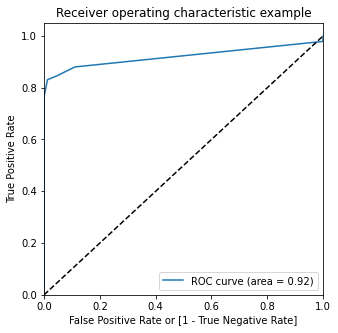

In [ ]:
#plot ROC Curve
draw_roc(y_test,y_test_pred_dt_prod)

The ROC Score for Decision Tree is 0.92 which is good.

<H3> Random Forest </H3>

In [ ]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Kfold and Params Turning for Random Forest
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

#Params
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20],
    'criterion': ['gini','entropy']
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = rf, 
                           param_distributions=param_grid,
                           scoring = 'roc_auc', 
                           cv = folds,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(5, 10, 5),
                                        'max_features': [10, 20],
                                        'min_samples_leaf': range(50, 150, 50),
                                        'min_samples_split': range(50, 150, 50),
                                        'n_estimators': [100, 200, 300]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
#printing the optimal score and hyperperameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9809403533202573 using {'n_estimators': 300, 'min_samples_split': 50, 'min_samples_leaf': 100, 'max_features': 20, 'max_depth': 5, 'criterion': 'entropy'}


In [ ]:
#creating a model with best hyperparameters
rf_ib_model = RandomForestClassifier(bootstrap=True,
                                     n_estimators= 300, 
                                     min_samples_split= 50,
                                     min_samples_leaf= 50, 
                                     max_features= 10, 
                                     max_depth= 5,
                                     criterion= 'entropy')

In [ ]:
#fitting the model
rf_ib_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=10,
                       min_samples_leaf=50, min_samples_split=50,
                       n_estimators=300)

In [ ]:
#predicting the model
y_test_pred_rf = rf_ib_model.predict(X_test)

In [ ]:
# confusion metrics and classification report 
confusion_matrix_stats(y_test,y_test_pred_rf)

[[84962    14]
 [   46    96]]


##################################################
Accuracy:- 0.9993
Sensitivity:- 0.6761
Specificity:- 0.9998
F1-Score:- 0.7619047619047619
##################################################


**********Classification Report**********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.87      0.68      0.76       142

    accuracy                           1.00     85118
   macro avg       0.94      0.84      0.88     85118
weighted avg       1.00      1.00      1.00     85118



In [ ]:
#prediction probability
y_test_pred_rf_prod = rf_ib_model.predict_proba(X_test)[:,1]

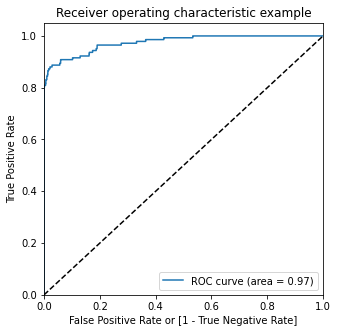

In [ ]:
#plot ROC Curve
draw_roc(y_test,y_test_pred_rf_prod)

<H3> XGBoost </H3>

In [ ]:
# Importing XGBoost
from xgboost import XGBClassifier

In [ ]:
# Kfolds and Hyperparameter Turning for XGBoost

folds = StratifiedKFold(n_splits= 3, random_state=0, shuffle=True) 

#parameter initialisation
param_grid = {'learning_rate': [0.05, 0.1, 0.2, 0.3], 
             'subsample': [0.3, 0.6, 0.9],
              'n_estimators':[200,500,700,1000]
              }

#model specification
xgboost_model = XGBClassifier(objective='binary:logistic',random_state=0,max_depth=2)

# set up RondomizedSearchCV()
model_cv = RandomizedSearchCV(estimator = xgboost_model, 
                        param_distributions = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1,
                        return_train_score=True)  


#fit the model
model_cv.fit(X_train,y_train)
     

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=XGBClassifier(max_depth=2), n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.3],
                                        'n_estimators': [200, 500, 700, 1000],
                                        'subsample': [0.3, 0.6, 0.9]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,250.571967,1.627103,1.701975,0.010154,0.3,1000,0.3,"{'subsample': 0.3, 'n_estimators': 1000, 'lear...",0.971199,0.977446,0.970220,0.972955,0.003201,9,1.000000,1.000000,1.000000,1.000000,0.000000e+00
1,315.405428,1.718608,1.910431,0.059344,0.9,1000,0.3,"{'subsample': 0.9, 'n_estimators': 1000, 'lear...",0.979966,0.987189,0.975635,0.980930,0.004766,5,1.000000,1.000000,1.000000,1.000000,0.000000e+00
2,210.694107,1.655012,1.061472,0.004261,0.9,500,0.3,"{'subsample': 0.9, 'n_estimators': 500, 'learn...",0.979018,0.987439,0.975361,0.980606,0.005057,6,1.000000,1.000000,1.000000,1.000000,0.000000e+00
3,312.050351,1.383222,2.059729,0.080396,0.6,1000,0.2,"{'subsample': 0.6, 'n_estimators': 1000, 'lear...",0.977830,0.989555,0.976046,0.981144,0.005992,4,1.000000,1.000000,1.000000,1.000000,0.000000e+00
4,134.149913,0.766751,1.353051,0.024608,0.3,700,0.3,"{'subsample': 0.3, 'n_estimators': 700, 'learn...",0.971397,0.983737,0.970392,0.975175,0.006068,8,1.000000,1.000000,1.000000,1.000000,0.000000e+00
5,194.612962,1.090437,1.401313,0.008189,0.6,700,0.05,"{'subsample': 0.6, 'n_estimators': 700, 'learn...",0.980488,0.992079,0.980107,0.984225,0.005556,1,0.999981,0.999976,0.999986,0.999981,4.055734e-06
6,269.637546,0.646238,1.484812,0.013745,0.9,1000,0.05,"{'subsample': 0.9, 'n_estimators': 1000, 'lear...",0.978643,0.989935,0.979940,0.982840,0.005045,3,0.999999,0.999998,0.999999,0.999999,4.108349e-07
7,203.461783,1.135552,1.465466,0.012091,0.9,700,0.2,"{'subsample': 0.9, 'n_estimators': 700, 'learn...",0.974724,0.991429,0.975332,0.980495,0.007735,7,1.000000,1.000000,1.000000,1.000000,0.000000e+00
8,154.167660,0.421041,1.007332,0.009160,0.9,500,0.1,"{'subsample': 0.9, 'n_estimators': 500, 'learn...",0.978893,0.990780,0.979761,0.983145,0.005411,2,0.999999,0.999999,0.999999,0.999999,3.241423e-07
9,86.792399,0.635095,0.821338,0.002990,0.3,500,0.2,"{'subsample': 0.3, 'n_estimators': 500, 'learn...",0.964474,0.980527,0.969565,0.971522,0.006698,10,1.000000,1.000000,1.000000,1.000000,4.841098e-08


In [ ]:
#printing the best model params
print(model_cv.best_params_)

{'subsample': 0.6, 'n_estimators': 700, 'learning_rate': 0.05}


In [ ]:
# initiating the model and fit the model
params = {'subsample': 0.6, 'n_estimators': 500, 'learning_rate': 0.05,'objective':'binary:logistic','max_depth':2}

#fit the model on training data
xgboost_model = XGBClassifier(params= params)
xgboost_model.fit(X_train,y_train)


XGBClassifier(params={'learning_rate': 0.05, 'max_depth': 2,
                      'n_estimators': 500, 'objective': 'binary:logistic',
                      'subsample': 0.6})

In [ ]:
# Predictions on the train set
y_test_pred_xgb = xgboost_model.predict(X_test)

In [ ]:
# confusion metrics and classification report 
confusion_matrix_stats(y_test,y_test_pred_xgb)

[[84967     9]
 [   37   105]]


##################################################
Accuracy:- 0.9995
Sensitivity:- 0.7394
Specificity:- 0.9999
F1-Score:- 0.8203125
##################################################


**********Classification Report**********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.92      0.74      0.82       142

    accuracy                           1.00     85118
   macro avg       0.96      0.87      0.91     85118
weighted avg       1.00      1.00      1.00     85118



In [ ]:
#prediction probability
y_test_pred_xgb_prod = xgboost_model.predict_proba(X_test)[:,1]

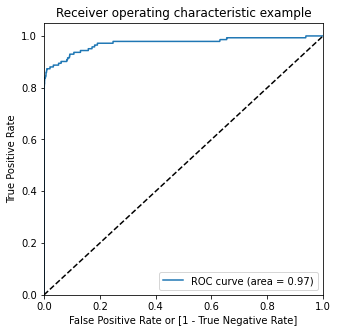

In [ ]:
#plot ROC Curve
draw_roc(y_test,y_test_pred_xgb_prod)

<H3> KNN Algorithm </H3>

In [ ]:
#importing libraries
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Kfolds and Hyperparameter Turning for XGBoost
folds = StratifiedKFold(n_splits= 3, random_state=0, shuffle=True) 

params = {'n_neighbors' : list(range(3,15,2))} 

#initiate the model
KNN_Model = KNeighborsClassifier()

#RandomizedSearchCV
model_cv = RandomizedSearchCV(estimator = KNN_Model, 
                           param_distributions=params,
                           scoring = 'roc_auc', 
                           cv = folds,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

#fitting the model
model_cv.fit(X_train,y_train)



Fitting 3 folds for each of 6 candidates, totalling 18 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': [3, 5, 7, 9, 11, 13]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.051341,0.012010,179.522151,2.220179,3,{'n_neighbors': 3},0.927133,0.914306,0.904472,0.915304,0.009278,6,0.999950,0.999945,0.999940,0.999945,0.000004
1,0.050498,0.000526,241.821803,6.864209,5,{'n_neighbors': 5},0.936226,0.927768,0.904427,0.922807,0.013447,5,0.999894,0.999891,0.999891,0.999892,0.000002
2,0.064070,0.011503,244.903799,7.311932,7,{'n_neighbors': 7},0.940729,0.932233,0.904387,0.925783,0.015522,1,0.999862,0.999840,0.999853,0.999852,0.000009
3,0.080733,0.013720,240.850199,5.745608,9,{'n_neighbors': 9},0.940697,0.932194,0.904347,0.925746,0.015524,2,0.999818,0.999796,0.999814,0.999809,0.000009
4,0.075582,0.009932,226.756348,7.399262,11,{'n_neighbors': 11},0.940666,0.932155,0.904312,0.925711,0.015525,3,0.999780,0.999757,0.999779,0.999772,0.000011
5,0.078491,0.013072,176.294025,5.577911,13,{'n_neighbors': 13},0.940633,0.932125,0.904269,0.925676,0.015530,4,0.999747,0.999711,0.999750,0.999736,0.000018


In [ ]:
#printing the best model params
print(model_cv.best_params_)

{'n_neighbors': 7}


In [ ]:
#fit the model on training data
KNN_model = KNeighborsClassifier(n_neighbors= 7)
KNN_model.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=7)

In [ ]:
# Predictions on the train set
y_test_pred_knn = KNN_model.predict(X_test)

In [ ]:
# confusion metrics and classification report 
confusion_matrix_stats(y_test,y_test_pred_knn)

[[84968     8]
 [   43    99]]


##################################################
Accuracy:- 0.9994
Sensitivity:- 0.6972
Specificity:- 0.9999
F1-Score:- 0.7951807228915663
##################################################


**********Classification Report**********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.93      0.70      0.80       142

    accuracy                           1.00     85118
   macro avg       0.96      0.85      0.90     85118
weighted avg       1.00      1.00      1.00     85118



In [ ]:
#prediction probability
y_test_pred_knn_prod = KNN_model.predict_proba(X_test)[:,1]

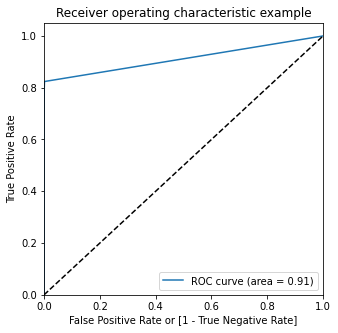

In [ ]:
#plot ROC Curve
draw_roc(y_test,y_test_pred_knn_prod)

<H3> Observation on various model with Imbalanced Data </h3>
We can see that among the models(LogisticRegression, DecisionTree, Random Forest, XGBoost and KNN) we found that Logistic Regression, Random Forest and XGBoost have the ROC_AUC Score of 0.97 where as DecisionTree have 0.92 and KNN 0.91. 

Though the ROC score is same for 3 model but on comparison with other factors like F1, specificity, sensitivity and Accuracy the XGBoost performs better when compared to other models so we can choose XGBoost will give best overall results.

<h3> Print the important features of the best model

Top var = 18
2nd Top var = 15
3rd Top var = 11


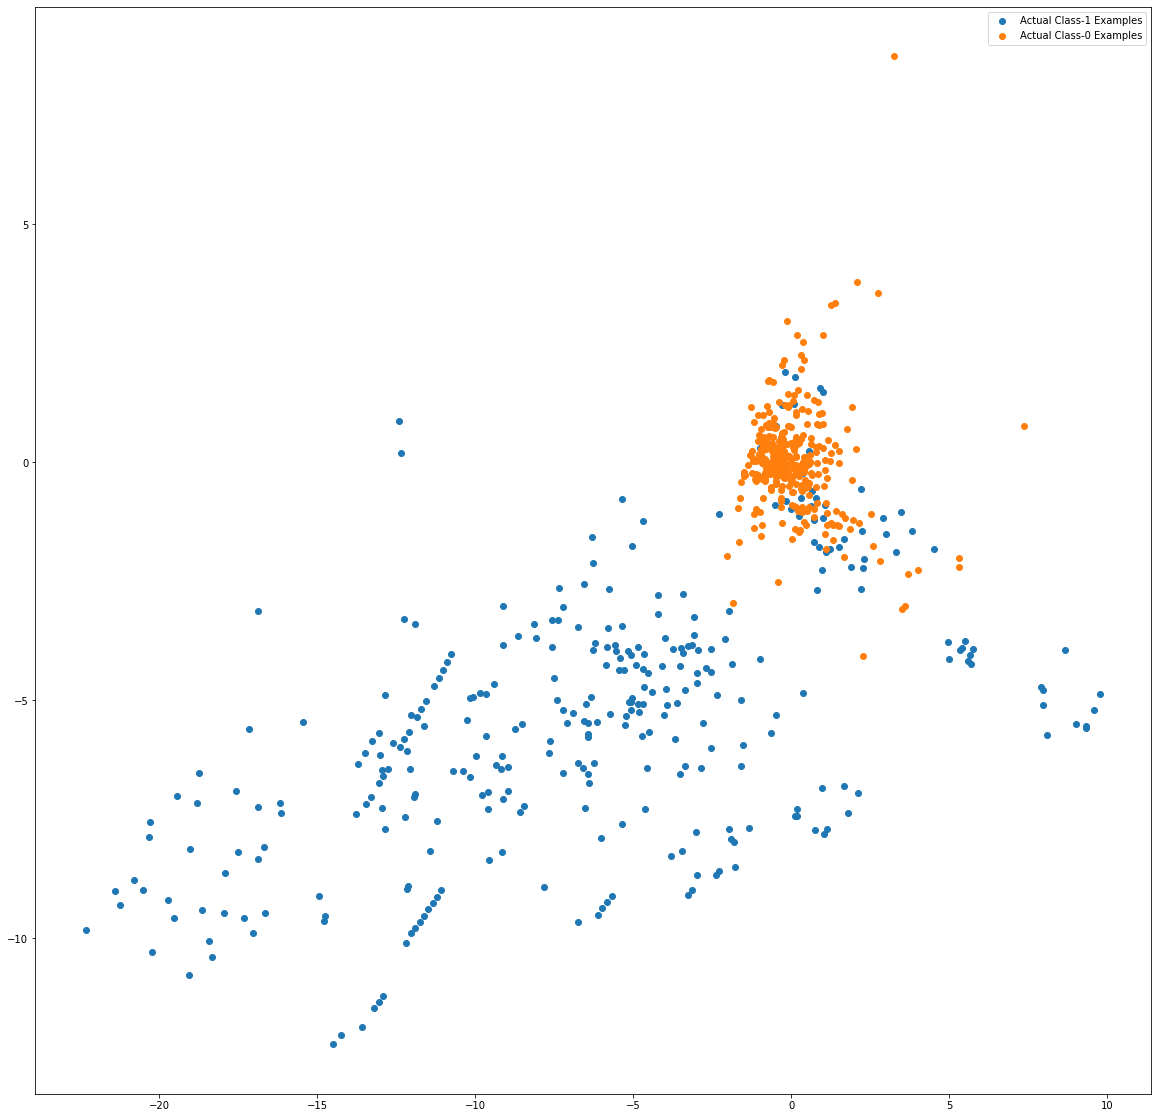

In [ ]:

var_imp = []
for i in xgboost_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgboost_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgboost_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgboost_model.feature_importances_)[-3])+1)
# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgboost_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgboost_model.feature_importances_)[-2])

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
print('Test auc =', metrics.roc_auc_score(y_test, y_test_pred_xgb_prod))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_xgb_prod)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Test auc = 0.9720043157173128
Threshold= 0.0031453483


<H3> Handling Data Imbalance</h3>

As we see that the data is heavily imbalanced, We will try several approaches for handling data imbalance.

* Undersampling :- Here for balancing the class distribution, the 
non-fraudulent transctions count will be reduced to 396 (similar count of fraudulent transctions)
* Oversampling :- Here we will make the same count of non-fraudulent transctions as fraudulent transctions.
* SMOTE :- Synthetic minority oversampling technique. It is another oversampling technique, which uses nearest neighbor algorithm to create synthetic data.
* Adasyn:- This is similar to SMOTE with minor changes that the new synthetic data is generated on the region of low density of imbalanced data points.

<h3> Undersampling </h3>

In [ ]:
# Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
# instantiating the random undersampler 
rus = RandomUnderSampler()
# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [ ]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_rus))

Before sampling class distribution:- Counter({0: 198277, 1: 331})
New class distribution:- Counter({0: 331, 1: 331})


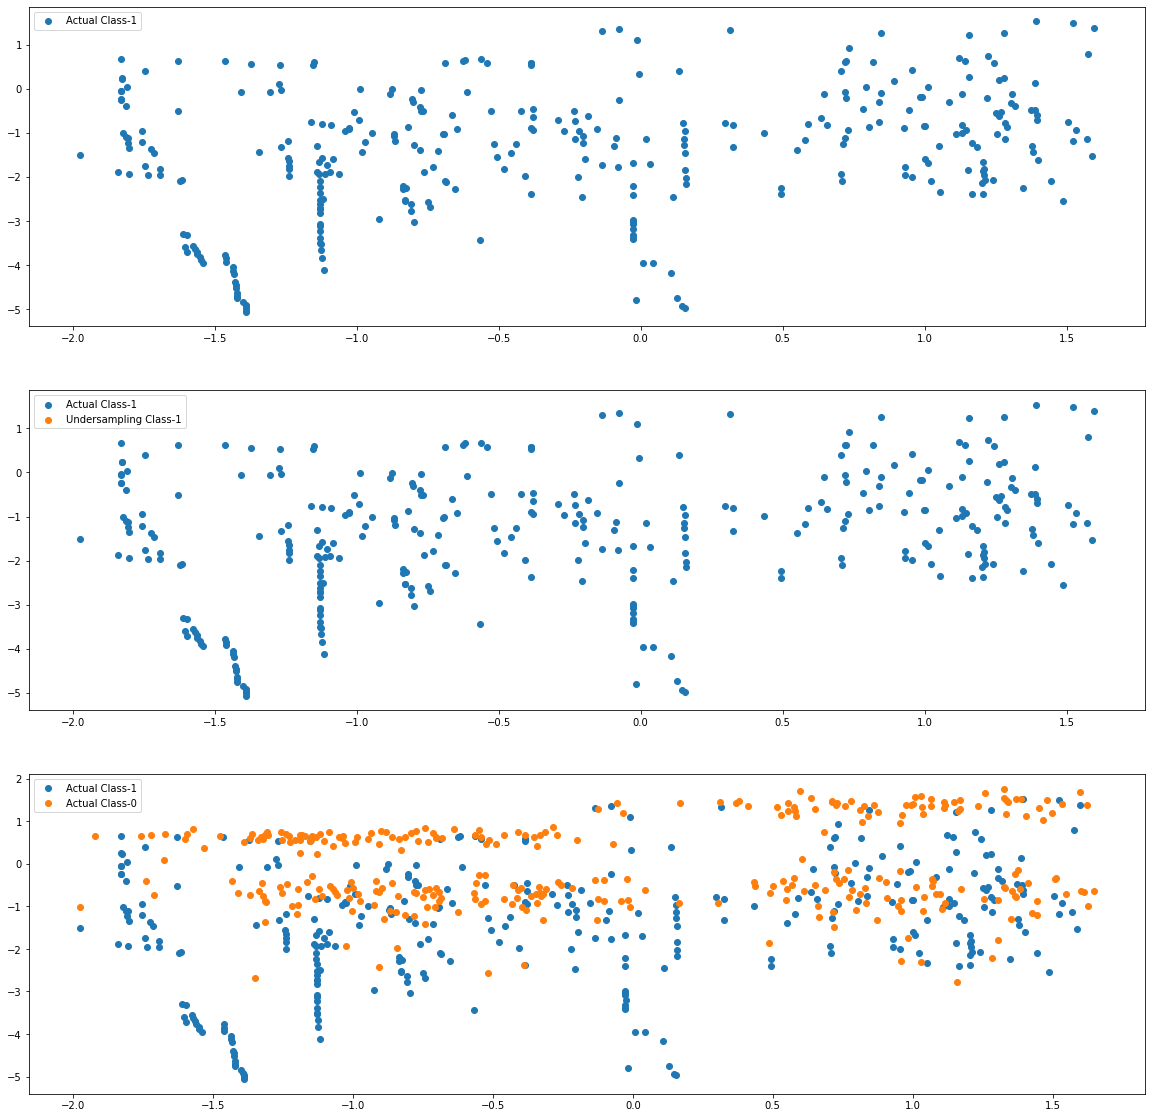

In [ ]:
#Plot distribution

X_train_rus_1 = X_train_rus[X_train.shape[0]:]

X_train_1 = X_train_rus[np.where(y_train_rus==1.0)]
X_train_0 = X_train_rus[np.where(y_train_rus==0.0)]

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1')
plt.scatter(X_train_rus_1[:X_train_1.shape[0], 0], X_train_rus_1[:X_train_1.shape[0], 1],
            label='Undersampling Class-1')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0')
plt.legend()

<H4> Model Building on Balanced Data with Undersampling </H4>

<H4> Logistic Regression </H4>

In [ ]:
#creating Kfolds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000],"solver":['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear']}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_rus, y_train_rus)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga',
                                    'liblinear']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015793,0.000880,0.001578,0.000089,0.01,newton-cg,"{'C': 0.01, 'solver': 'newton-cg'}",0.985979,0.994573,0.976125,...,0.985275,0.006406,1,0.988593,0.988279,0.991897,0.988309,0.990374,0.989491,0.001431
1,0.006747,0.000511,0.001501,0.000020,0.01,lbfgs,"{'C': 0.01, 'solver': 'lbfgs'}",0.985979,0.994573,0.976125,...,0.985275,0.006406,1,0.988593,0.988279,0.991897,0.988309,0.990374,0.989491,0.001431
2,0.030327,0.000204,0.001520,0.000049,0.01,sag,"{'C': 0.01, 'solver': 'sag'}",0.985527,0.994573,0.976125,...,0.985092,0.006346,3,0.988694,0.988308,0.991926,0.988281,0.990260,0.989494,0.001416
3,0.034580,0.000292,0.001514,0.000031,0.01,saga,"{'C': 0.01, 'solver': 'saga'}",0.983944,0.994120,0.975895,...,0.984639,0.006033,7,0.988951,0.988451,0.991556,0.987868,0.989705,0.989306,0.001276
4,0.003602,0.000210,0.001433,0.000014,0.01,liblinear,"{'C': 0.01, 'solver': 'liblinear'}",0.980552,0.992763,0.974747,...,0.982909,0.005887,18,0.989108,0.988622,0.990345,0.987597,0.988537,0.988842,0.000897
5,0.020919,0.006807,0.001506,0.000045,0.1,newton-cg,"{'C': 0.1, 'solver': 'newton-cg'}",0.985753,0.993668,0.974518,...,0.984773,0.007051,4,0.990680,0.991052,0.994689,0.990659,0.992723,0.991961,0.001561
6,0.009456,0.000466,0.001611,0.000132,0.1,lbfgs,"{'C': 0.1, 'solver': 'lbfgs'}",0.985753,0.993668,0.974518,...,0.984773,0.007051,4,0.990680,0.991052,0.994689,0.990659,0.992723,0.991961,0.001561
7,0.030420,0.000607,0.001479,0.000054,0.1,sag,"{'C': 0.1, 'solver': 'sag'}",0.984170,0.993894,0.974288,...,0.984685,0.006944,6,0.990452,0.991038,0.994333,0.990189,0.991940,0.991590,0.001497
8,0.034417,0.000305,0.001432,0.000012,0.1,saga,"{'C': 0.1, 'solver': 'saga'}",0.982813,0.993668,0.974288,...,0.984507,0.006395,8,0.990337,0.990380,0.993364,0.989548,0.991072,0.990940,0.001304
9,0.003816,0.000298,0.001506,0.000146,0.1,liblinear,"{'C': 0.1, 'solver': 'liblinear'}",0.982361,0.992763,0.974288,...,0.983546,0.006691,17,0.990923,0.991495,0.994774,0.990687,0.992325,0.992041,0.001478


In [ ]:
# checking the best score model with better c
best_score_lr = model_cv.best_score_
best_C_lr = model_cv.best_params_['C']
best_solver_lr = model_cv.best_params_['solver']

#Print the result
print("the highest roc_auc score is {0} at C = {1} and solver is {2}".format(best_score_lr,best_C_lr,best_solver_lr))

the highest roc_auc score is 0.98527472828694 at C = 0.01 and solver is newton-cg


In [ ]:
# predicting the model with above metrics
lr_ib_rus_model = LogisticRegression(C=best_C_lr,solver=best_solver_lr)

#fitting the model on train data

y_train_pred_lr_rus = lr_ib_rus_model.fit(X_train_rus,y_train_rus)

In [ ]:
#predict the model
y_test_pred_lr_rus = lr_ib_rus_model.predict(X_test)

In [ ]:
# confusion metrics and classification report 
confusion_matrix_stats(y_test,y_test_pred_lr_rus)

[[84061   915]
 [   20   122]]


##################################################
Accuracy:- 0.989
Sensitivity:- 0.8592
Specificity:- 0.9892
F1-Score:- 0.20695504664970313
##################################################


**********Classification Report**********
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     84976
           1       0.12      0.86      0.21       142

    accuracy                           0.99     85118
   macro avg       0.56      0.92      0.60     85118
weighted avg       1.00      0.99      0.99     85118



In [ ]:
#prediction probability
y_test_pred_lr_prod_rus = lr_ib_rus_model.predict_proba(X_test)[:,1]

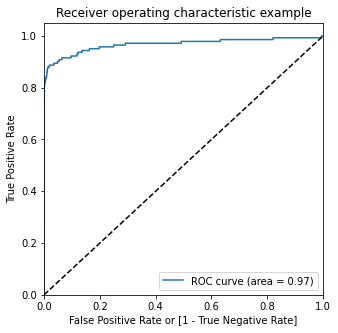

In [ ]:
#plot ROC Curve
draw_roc(y_test,y_test_pred_lr_prod_rus)

<h4>Decision Tree</h4>

In [ ]:
#creating param grid 
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

param_grid = {
    'max_depth': range(3, 10, 1),
    'min_samples_leaf': [1,2,4,10,20,30],                 ## Hyperparameter: min_samples_leaf to be tuned
     'criterion': ['gini','entropy'],                                     
    'min_samples_split':[2,3,5,10,20,30,50]
}

#Initiating Decision Tree
DTree = DecisionTreeClassifier()

grid_search_dt_rus = RandomizedSearchCV(estimator=DTree,
                              param_distributions=param_grid,
                              scoring='roc_auc',
                              cv=folds,
                              verbose=1)


#fitting the grid search to data
grid_search_dt_rus.fit(X_train_rus,y_train_rus)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(3, 10),
                                        'min_samples_leaf': [1, 2, 4, 10, 20,
                                                             30],
                                        'min_samples_split': [2, 3, 5, 10, 20,
                                                              30, 50]},
                   scoring='roc_auc', verbose=1)

In [ ]:
#cv results
cv_results_dt = pd.DataFrame(grid_search_dt_rus.cv_results_)
cv_results_dt

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004358,0.000537,0.001192,0.000091,2,30,6,gini,"{'min_samples_split': 2, 'min_samples_leaf': 3...",0.977068,0.956143,0.958554,0.963921,0.009348,3
1,0.005257,0.000122,0.001120,0.000016,50,10,7,entropy,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.980672,0.959623,0.946281,0.962192,0.014157,7
2,0.004619,0.000220,0.001107,0.000006,50,2,3,entropy,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.945946,0.951597,0.950083,0.949209,0.002388,10
3,0.004252,0.000289,0.001159,0.000082,50,20,5,gini,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.974734,0.951556,0.963967,0.963419,0.009470,5
4,0.004721,0.000175,0.001108,0.000013,10,30,6,entropy,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.975962,0.958640,0.952273,0.962292,0.010010,6
5,0.004571,0.000280,0.001137,0.000038,20,10,5,gini,"{'min_samples_split': 20, 'min_samples_leaf': ...",0.966544,0.951310,0.962810,0.960221,0.006483,8
6,0.005337,0.000210,0.001109,0.000015,30,1,5,gini,"{'min_samples_split': 30, 'min_samples_leaf': ...",0.963595,0.956102,0.947686,0.955794,0.006499,9
7,0.004018,0.000147,0.001100,0.000006,3,30,4,gini,"{'min_samples_split': 3, 'min_samples_leaf': 3...",0.977969,0.959009,0.962231,0.966403,0.008283,1
8,0.004717,0.000182,0.001100,0.000007,10,30,9,entropy,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.975962,0.964701,0.951777,0.964147,0.009881,2
9,0.004306,0.000251,0.001100,0.000006,2,20,8,gini,"{'min_samples_split': 2, 'min_samples_leaf': 2...",0.975061,0.955364,0.960124,0.963517,0.008391,4


In [ ]:
#printing optimal score and hyperparameters
print("Best ROC AUC Score: ",grid_search_dt_rus.best_score_)
print(grid_search_dt_rus.best_estimator_)
best_estimator_dt = grid_search_dt_rus.best_estimator_

Best ROC AUC Score:  0.9664030973121882
DecisionTreeClassifier(max_depth=4, min_samples_leaf=30, min_samples_split=3)


In [ ]:
#Model with best estimators
dt_model_rus = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=20,min_samples_split=50)

dt_model_rus.fit(X_train_rus,y_train_rus)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=20,
                       min_samples_split=50)

In [ ]:
#Predicting on test data
y_train_pred_dt_rus = dt_model_rus.predict(X_test)

In [ ]:
# confusion metrics and classification report 
confusion_matrix_stats(y_test,y_train_pred_dt_rus)

[[79529  5447]
 [   16   126]]


##################################################
Accuracy:- 0.9358
Sensitivity:- 0.8873
Specificity:- 0.9359
F1-Score:- 0.04409448818897637
##################################################


**********Classification Report**********
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     84976
           1       0.02      0.89      0.04       142

    accuracy                           0.94     85118
   macro avg       0.51      0.91      0.51     85118
weighted avg       1.00      0.94      0.97     85118



In [ ]:
#prediction probability
y_test_pred_dt_prod_rus = dt_model_rus.predict_proba(X_test)[:,1]

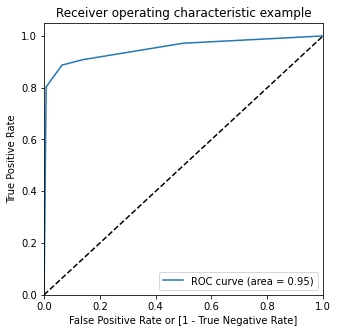

In [ ]:
#plot ROC Curve
draw_roc(y_test,y_test_pred_dt_prod_rus)

<H4> Random Forest </H4>

In [ ]:
# Kfold and Params Turning for Random Forest
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

#Params
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20],
    'criterion': ['gini','entropy']
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search_rus = RandomizedSearchCV(estimator = rf, 
                           param_distributions=param_grid,
                           scoring = 'roc_auc', 
                           cv = folds,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search_rus.fit(X_train_rus, y_train_rus)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(5, 10, 5),
                                        'max_features': [10, 20],
                                        'min_samples_leaf': range(50, 150, 50),
                                        'min_samples_split': range(50, 150, 50),
                                        'n_estimators': [100, 200, 300]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
#printing the optimal score and hyperperameters
print('We can get accuracy of',grid_search_rus.best_score_,'using',grid_search_rus.best_params_)

We can get accuracy of 0.9780031270940363 using {'n_estimators': 200, 'min_samples_split': 100, 'min_samples_leaf': 50, 'max_features': 20, 'max_depth': 5, 'criterion': 'gini'}


In [ ]:
#creating a model with best hyperparameters
rf_model_rus = RandomForestClassifier(bootstrap=True,
                                     n_estimators= 300, 
                                     min_samples_split= 100,
                                     min_samples_leaf= 50, 
                                     max_features= 10, 
                                     max_depth= 5,
                                     criterion= 'gini')

In [ ]:
#fitting the model
rf_model_rus.fit(X_train_rus,y_train_rus)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=300)

In [ ]:
#predicting the model
y_test_pred_rf_rus = rf_model_rus.predict(X_test)

In [ ]:
# confusion metrics and classification report 
confusion_matrix_stats(y_test,y_test_pred_rf_rus)

[[83438  1538]
 [   20   122]]


##################################################
Accuracy:- 0.9817
Sensitivity:- 0.8592
Specificity:- 0.9819
F1-Score:- 0.13540510543840176
##################################################


**********Classification Report**********
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84976
           1       0.07      0.86      0.14       142

    accuracy                           0.98     85118
   macro avg       0.54      0.92      0.56     85118
weighted avg       1.00      0.98      0.99     85118



In [ ]:
#prediction probability
y_test_pred_rf_prod_rus = rf_model_rus.predict_proba(X_test)[:,1]

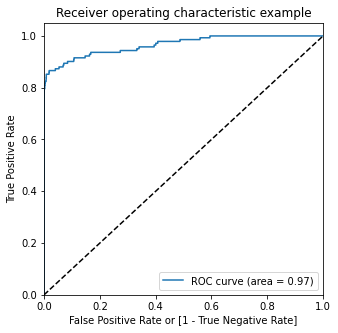

In [ ]:
#plot ROC Curve
draw_roc(y_test,y_test_pred_rf_prod_rus)

<H4> XGBoost </H4>

In [ ]:
# Kfolds and Hyperparameter Turning for XGBoost

folds = StratifiedKFold(n_splits= 3, random_state=0, shuffle=True) 

#parameter initialisation
param_grid = {'learning_rate': [0.05, 0.1, 0.2, 0.3], 
             'subsample': [0.3, 0.6, 0.9],
              'n_estimators':[200,500,700,1000]
              }

#model specification
xgboost_model = XGBClassifier(objective='binary:logistic',random_state=0,max_depth=2)

# set up RondomizedSearchCV()
model_cv = RandomizedSearchCV(estimator = xgboost_model, 
                        param_distributions = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1,
                        return_train_score=True)  


#fit the model
model_cv.fit(X_train_rus,y_train_rus)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=XGBClassifier(max_depth=2), n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.3],
                                        'n_estimators': [200, 500, 700, 1000],
                                        'subsample': [0.3, 0.6, 0.9]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.825771,0.090800,0.006477,0.000623,0.6,500,0.2,"{'subsample': 0.6, 'n_estimators': 500, 'learn...",0.987551,0.963309,0.978182,0.976347,0.009982,2,1.0,1.000000,1.0,1.000000,0.000000
1,2.871505,0.027444,0.007469,0.000598,0.3,500,0.1,"{'subsample': 0.3, 'n_estimators': 500, 'learn...",0.988043,0.963063,0.974380,0.975162,0.010213,4,1.0,1.000000,1.0,1.000000,0.000000
2,4.694988,0.019935,0.007143,0.000709,0.9,1000,0.3,"{'subsample': 0.9, 'n_estimators': 1000, 'lear...",0.984029,0.961179,0.978099,0.974436,0.009681,5,1.0,1.000000,1.0,1.000000,0.000000
3,1.864352,0.006315,0.006281,0.000146,0.3,200,0.3,"{'subsample': 0.3, 'n_estimators': 200, 'learn...",0.982883,0.965274,0.971240,0.973132,0.007312,9,1.0,0.999671,1.0,0.999890,0.000155
4,1.792468,0.005322,0.007543,0.000379,0.6,500,0.05,"{'subsample': 0.6, 'n_estimators': 500, 'learn...",0.989517,0.963882,0.978182,0.977194,0.010489,1,1.0,1.000000,1.0,1.000000,0.000000
5,3.572325,0.003914,0.007876,0.000368,0.9,1000,0.2,"{'subsample': 0.9, 'n_estimators': 1000, 'lear...",0.985831,0.960442,0.976033,0.974102,0.010455,8,1.0,1.000000,1.0,1.000000,0.000000
6,1.786557,0.001475,0.007694,0.000282,0.9,500,0.1,"{'subsample': 0.9, 'n_estimators': 500, 'learn...",0.987387,0.959132,0.976777,0.974432,0.011654,6,1.0,1.000000,1.0,1.000000,0.000000
7,3.340867,0.004234,0.004417,0.000529,0.6,1000,0.2,"{'subsample': 0.6, 'n_estimators': 1000, 'lear...",0.986814,0.962735,0.978760,0.976103,0.010008,3,1.0,1.000000,1.0,1.000000,0.000000
8,2.312477,0.002424,0.005632,0.000695,0.3,700,0.3,"{'subsample': 0.3, 'n_estimators': 700, 'learn...",0.980098,0.967486,0.968347,0.971977,0.005753,10,1.0,0.999753,1.0,0.999918,0.000116
9,2.299217,0.003408,0.005095,0.000782,0.6,700,0.1,"{'subsample': 0.6, 'n_estimators': 700, 'learn...",0.986896,0.962162,0.973636,0.974232,0.010106,7,1.0,1.000000,1.0,1.000000,0.000000


In [ ]:
#printing the best model params
print(model_cv.best_params_)

{'subsample': 0.6, 'n_estimators': 500, 'learning_rate': 0.05}


In [ ]:
# initiating the model and fit the model
params = {'subsample': 0.3, 'n_estimators': 1000, 'learning_rate': 0.05,'objective':'binary:logistic','max_depth':2}

#fit the model on training data
xgboost_model_rus = XGBClassifier(params= params)
xgboost_model_rus.fit(X_train_rus,y_train_rus)


XGBClassifier(params={'learning_rate': 0.05, 'max_depth': 2,
                      'n_estimators': 1000, 'objective': 'binary:logistic',
                      'subsample': 0.3})

In [ ]:
# Predictions on the train set
y_test_pred_xgb_rus = xgboost_model_rus.predict(X_test)

In [ ]:
# confusion metrics and classification report 
confusion_matrix_stats(y_test,y_test_pred_xgb_rus)

[[81521  3455]
 [   17   125]]


##################################################
Accuracy:- 0.9592
Sensitivity:- 0.8803
Specificity:- 0.9593
F1-Score:- 0.06716818914562063
##################################################


**********Classification Report**********
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     84976
           1       0.03      0.88      0.07       142

    accuracy                           0.96     85118
   macro avg       0.52      0.92      0.52     85118
weighted avg       1.00      0.96      0.98     85118



In [ ]:
#prediction probability
y_test_pred_xgb_prod_rus = xgboost_model_rus.predict_proba(X_test)[:,1]

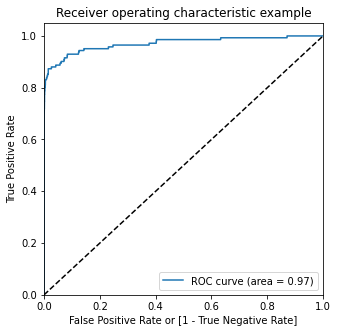

In [ ]:
#plot ROC Curve
draw_roc(y_test,y_test_pred_xgb_prod_rus)

<h3> KNN </h3>

In [ ]:
# Kfolds and Hyperparameter Turning for XGBoost
folds = StratifiedKFold(n_splits= 3, random_state=0, shuffle=True) 

params = {'n_neighbors' : list(range(3,15,2))} 

#initiate the model
KNN_Model = KNeighborsClassifier()

#RandomizedSearchCV
model_cv = RandomizedSearchCV(estimator = KNN_Model, 
                           param_distributions=params,
                           scoring = 'roc_auc', 
                           cv = folds,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

#fitting the model
model_cv.fit(X_train_rus,y_train_rus)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': [3, 5, 7, 9, 11, 13]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.000905,0.000009,0.004561,0.000594,3,{'n_neighbors': 3},0.960483,0.954095,0.966860,0.960479,0.005211,6,0.995928,0.996072,0.994267,0.995422,0.000819
1,0.001064,0.000216,0.005427,0.000096,5,{'n_neighbors': 5},0.967895,0.952170,0.970083,0.963383,0.007978,5,0.992904,0.994231,0.993653,0.993596,0.000543
2,0.001346,0.000029,0.005099,0.000735,7,{'n_neighbors': 7},0.974406,0.955078,0.967438,0.965641,0.007992,4,0.989665,0.992678,0.991544,0.991296,0.001243
3,0.001485,0.000101,0.005332,0.000373,9,{'n_neighbors': 9},0.977641,0.955692,0.974050,0.969128,0.009613,3,0.987135,0.991022,0.988555,0.988904,0.001606
4,0.001193,0.000076,0.004689,0.000674,11,{'n_neighbors': 11},0.977191,0.957903,0.973843,0.969646,0.008415,2,0.987084,0.990621,0.987101,0.988269,0.001664
5,0.001086,0.000112,0.004666,0.000731,13,{'n_neighbors': 13},0.979853,0.965274,0.973884,0.973004,0.005984,1,0.987166,0.990292,0.987029,0.988162,0.001507


In [ ]:
#printing the best model params
print(model_cv.best_params_)

{'n_neighbors': 13}


In [ ]:
#fit the model on training data
KNN_model_rus = KNeighborsClassifier(n_neighbors= 13)
KNN_model_rus.fit(X_train_rus,y_train_rus)


KNeighborsClassifier(n_neighbors=13)

In [ ]:
# Predictions on the train set
y_test_pred_knn_rus = KNN_model_rus.predict(X_test)

In [ ]:
# confusion metrics and classification report 
confusion_matrix_stats(y_test,y_test_pred_knn_rus)

[[84102   874]
 [   21   121]]


##################################################
Accuracy:- 0.9895
Sensitivity:- 0.8521
Specificity:- 0.9897
F1-Score:- 0.21284080914687772
##################################################


**********Classification Report**********
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     84976
           1       0.12      0.85      0.21       142

    accuracy                           0.99     85118
   macro avg       0.56      0.92      0.60     85118
weighted avg       1.00      0.99      0.99     85118



In [ ]:
#prediction probability
y_test_pred_knn_prod_rus = KNN_model_rus.predict_proba(X_test)[:,1]

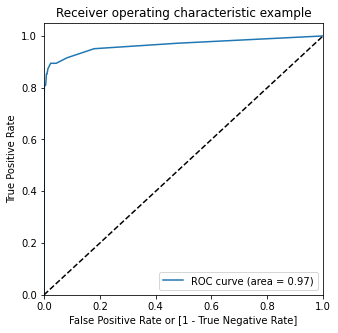

In [ ]:
#plot ROC Curve
draw_roc(y_test,y_test_pred_knn_prod_rus)

<H3> Model Building with Oversampling </h3>

In [ ]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# instantiating the random oversampler 
os = RandomOverSampler()
# resampling X, y
X_train_os, y_train_os = os.fit_resample(X_train, y_train)

In [ ]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_os))

Before sampling class distribution:- Counter({0: 198277, 1: 331})
New class distribution:- Counter({0: 198277, 1: 198277})


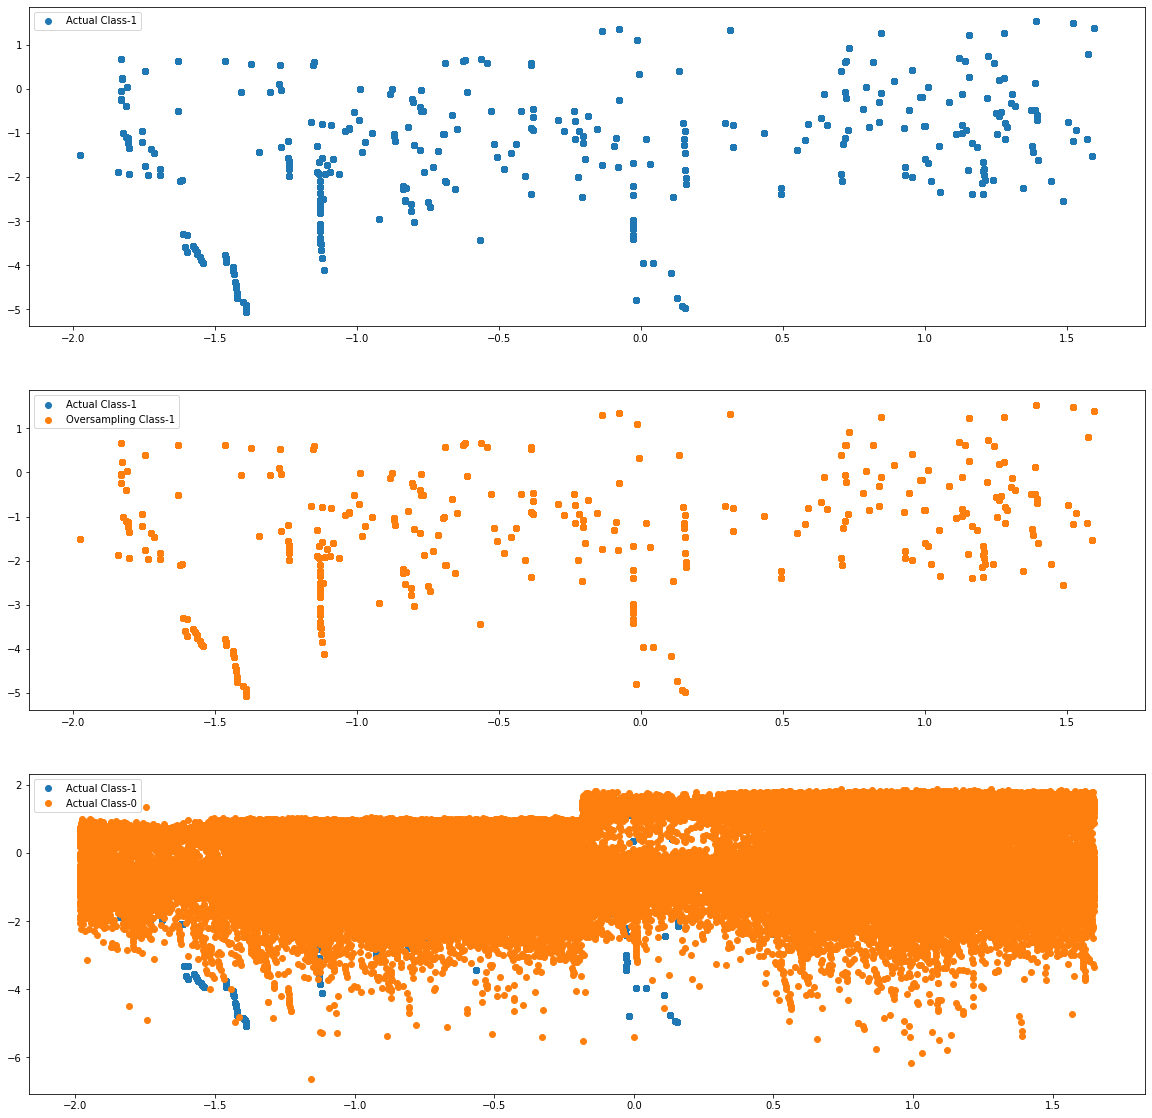

In [ ]:
#Plot distribution

X_train_os_1 = X_train_os[X_train.shape[0]:]

X_train_1 = X_train_os[np.where(y_train_os==1.0)]
X_train_0 = X_train_os[np.where(y_train_os==0.0)]

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1')
plt.scatter(X_train_os_1[:X_train_1.shape[0], 0], X_train_os_1[:X_train_1.shape[0], 1],
            label='Oversampling Class-1')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0')
plt.legend()

<H4> Logistic Regression </H4>

In [ ]:
#creating Kfolds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000],"solver":['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear']}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_os, y_train_os)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga',
                                    'liblinear']},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.772233,0.104647,0.033028,0.001052,0.01,newton-cg,"{'C': 0.01, 'solver': 'newton-cg'}",0.989820,0.989895,0.990484,...,0.990042,0.000232,27,0.990121,0.990077,0.989937,0.990077,0.990080,0.990058,0.000063
1,0.930142,0.046228,0.032895,0.001581,0.01,lbfgs,"{'C': 0.01, 'solver': 'lbfgs'}",0.989821,0.989895,0.990484,...,0.990042,0.000232,28,0.990121,0.990077,0.989937,0.990077,0.990080,0.990058,0.000063
2,3.332797,0.183000,0.030601,0.000326,0.01,sag,"{'C': 0.01, 'solver': 'sag'}",0.989820,0.989895,0.990485,...,0.990042,0.000232,26,0.990121,0.990077,0.989937,0.990077,0.990080,0.990058,0.000063
3,8.183516,0.767049,0.030761,0.000070,0.01,saga,"{'C': 0.01, 'solver': 'saga'}",0.989820,0.989895,0.990484,...,0.990041,0.000232,29,0.990120,0.990077,0.989936,0.990076,0.990079,0.990058,0.000063
4,2.263007,0.004175,0.030893,0.000238,0.01,liblinear,"{'C': 0.01, 'solver': 'liblinear'}",0.989820,0.989894,0.990481,...,0.990039,0.000231,30,0.990119,0.990074,0.989934,0.990071,0.990076,0.990055,0.000063
5,2.850724,0.117774,0.032807,0.001094,0.1,newton-cg,"{'C': 0.1, 'solver': 'newton-cg'}",0.989914,0.989970,0.990552,...,0.990116,0.000226,23,0.990197,0.990152,0.990013,0.990155,0.990154,0.990134,0.000063
6,0.973146,0.053778,0.031923,0.001301,0.1,lbfgs,"{'C': 0.1, 'solver': 'lbfgs'}",0.989913,0.989970,0.990552,...,0.990116,0.000226,22,0.990196,0.990152,0.990013,0.990155,0.990154,0.990134,0.000063
7,3.476861,0.229647,0.030761,0.000240,0.1,sag,"{'C': 0.1, 'solver': 'sag'}",0.989914,0.989970,0.990552,...,0.990116,0.000226,21,0.990197,0.990152,0.990013,0.990155,0.990154,0.990134,0.000063
8,10.800567,1.000423,0.030507,0.000089,0.1,saga,"{'C': 0.1, 'solver': 'saga'}",0.989913,0.989969,0.990551,...,0.990116,0.000226,24,0.990196,0.990152,0.990012,0.990154,0.990153,0.990133,0.000063
9,2.316974,0.013048,0.030970,0.000199,0.1,liblinear,"{'C': 0.1, 'solver': 'liblinear'}",0.989912,0.989969,0.990549,...,0.990115,0.000226,25,0.990196,0.990152,0.990012,0.990154,0.990152,0.990133,0.000063


In [ ]:
# checking the best score model with better c
best_score_lr = model_cv.best_score_
best_C_lr = model_cv.best_params_['C']
best_solver_lr = model_cv.best_params_['solver']

#Print the result
print("the highest roc_auc score is {0} at C = {1} and solver is {2}".format(best_score_lr,best_C_lr,best_solver_lr))

the highest roc_auc score is 0.9901255719049036 at C = 100 and solver is sag


In [ ]:
# predicting the model with above metrics
lr_os_model = LogisticRegression(C=best_C_lr,solver=best_solver_lr)

#fitting the model on train data

y_train_pred_lr_os = lr_os_model.fit(X_train_os,y_train_os)

In [ ]:
#predict the model
y_test_pred_lr_os = lr_os_model.predict(X_test)

In [ ]:
# confusion metrics and classification report 
confusion_matrix_stats(y_test,y_test_pred_lr_os)

[[82580  2396]
 [   16   126]]


##################################################
Accuracy:- 0.9717
Sensitivity:- 0.8873
Specificity:- 0.9718
F1-Score:- 0.0945945945945946
##################################################


**********Classification Report**********
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.89      0.09       142

    accuracy                           0.97     85118
   macro avg       0.52      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118



In [ ]:
#prediction probability
y_test_pred_lr_prod_os = lr_os_model.predict_proba(X_test)[:,1]

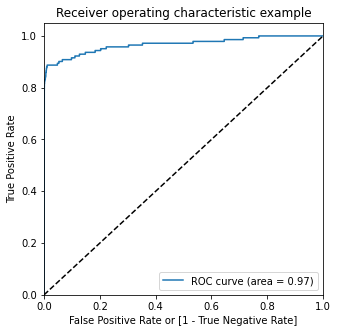

In [ ]:
#plot ROC Curve
draw_roc(y_test,y_test_pred_lr_prod_os)

<H4> Decision Tree </H4>

In [ ]:
#creating param grid 
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

param_grid = {
    'max_depth': range(3, 10, 1),
    'min_samples_leaf': [1,2,4,10,20,30],                 ## Hyperparameter: min_samples_leaf to be tuned
     'criterion': ['gini','entropy'],                                     
    'min_samples_split':[2,3,5,10,20,30,50]
}

#Initiating Decision Tree
DTree = DecisionTreeClassifier()

grid_search_dt_os = RandomizedSearchCV(estimator=DTree,
                              param_distributions=param_grid,
                              scoring='roc_auc',
                              cv=folds,
                              n_jobs = -1,
                              verbose=1)


#fitting the grid search to data
grid_search_dt_os.fit(X_train_os,y_train_os)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(3, 10),
                                        'min_samples_leaf': [1, 2, 4, 10, 20,
                                                             30],
                                        'min_samples_split': [2, 3, 5, 10, 20,
                                                              30, 50]},
                   scoring='roc_auc', verbose=1)

In [ ]:
#cv results
cv_results_dt = pd.DataFrame(grid_search_dt_rus.cv_results_)
cv_results_dt

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004358,0.000537,0.001192,0.000091,2,30,6,gini,"{'min_samples_split': 2, 'min_samples_leaf': 3...",0.977068,0.956143,0.958554,0.963921,0.009348,3
1,0.005257,0.000122,0.001120,0.000016,50,10,7,entropy,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.980672,0.959623,0.946281,0.962192,0.014157,7
2,0.004619,0.000220,0.001107,0.000006,50,2,3,entropy,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.945946,0.951597,0.950083,0.949209,0.002388,10
3,0.004252,0.000289,0.001159,0.000082,50,20,5,gini,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.974734,0.951556,0.963967,0.963419,0.009470,5
4,0.004721,0.000175,0.001108,0.000013,10,30,6,entropy,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.975962,0.958640,0.952273,0.962292,0.010010,6
5,0.004571,0.000280,0.001137,0.000038,20,10,5,gini,"{'min_samples_split': 20, 'min_samples_leaf': ...",0.966544,0.951310,0.962810,0.960221,0.006483,8
6,0.005337,0.000210,0.001109,0.000015,30,1,5,gini,"{'min_samples_split': 30, 'min_samples_leaf': ...",0.963595,0.956102,0.947686,0.955794,0.006499,9
7,0.004018,0.000147,0.001100,0.000006,3,30,4,gini,"{'min_samples_split': 3, 'min_samples_leaf': 3...",0.977969,0.959009,0.962231,0.966403,0.008283,1
8,0.004717,0.000182,0.001100,0.000007,10,30,9,entropy,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.975962,0.964701,0.951777,0.964147,0.009881,2
9,0.004306,0.000251,0.001100,0.000006,2,20,8,gini,"{'min_samples_split': 2, 'min_samples_leaf': 2...",0.975061,0.955364,0.960124,0.963517,0.008391,4


In [ ]:
#printing optimal score and hyperparameters
print("Best ROC AUC Score: ",grid_search_dt_os.best_score_)
print(grid_search_dt_os.best_estimator_)
best_estimator_dt = grid_search_dt_os.best_estimator_

Best ROC AUC Score:  0.9994880207347611
DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4,
                       min_samples_split=3)


In [ ]:
#Model with best estimators
dt_model_os = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=30,min_samples_split=10)

dt_model_os.fit(X_train_os,y_train_os)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=30,
                       min_samples_split=10)

In [ ]:
#Predicting on test data
y_train_pred_dt_os = dt_model_os.predict(X_test)

In [ ]:
# confusion metrics and classification report 
confusion_matrix_stats(y_test,y_train_pred_dt_os)

[[84005   971]
 [   31   111]]


##################################################
Accuracy:- 0.9882
Sensitivity:- 0.7817
Specificity:- 0.9886
F1-Score:- 0.18137254901960786
##################################################


**********Classification Report**********
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     84976
           1       0.10      0.78      0.18       142

    accuracy                           0.99     85118
   macro avg       0.55      0.89      0.59     85118
weighted avg       1.00      0.99      0.99     85118



In [ ]:
#prediction probability
y_test_pred_dt_prod_os = dt_model_os.predict_proba(X_test)[:,1]

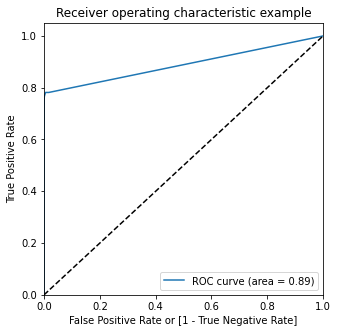

In [ ]:
#plot ROC Curve
draw_roc(y_test,y_test_pred_dt_prod_os)

<H4> Random Forest </H4>

In [ ]:
# Kfold and Params Turning for Random Forest
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

#Params
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20],
    'criterion': ['gini','entropy']
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search_os = RandomizedSearchCV(estimator = rf, 
                           param_distributions=param_grid,
                           scoring = 'roc_auc', 
                           cv = folds,
                           n_jobs = -1,
                           verbose = 1,
                           return_train_score=True)

# Fit the model
grid_search_os.fit(X_train_os, y_train_os)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(5, 10, 5),
                                        'max_features': [10, 20],
                                        'min_samples_leaf': range(50, 150, 50),
                                        'min_samples_split': range(50, 150, 50),
                                        'n_estimators': [100, 200, 300]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
#printing the optimal score and hyperperameters
print('We can get accuracy of',grid_search_os.best_score_,'using',grid_search_os.best_params_)

We can get accuracy of 0.9984599766605365 using {'n_estimators': 300, 'min_samples_split': 50, 'min_samples_leaf': 50, 'max_features': 20, 'max_depth': 5, 'criterion': 'entropy'}


In [ ]:
#creating a model with best hyperparameters
rf_model_os = RandomForestClassifier(bootstrap=True,
                                     n_estimators= 300, 
                                     min_samples_split= 50,
                                     min_samples_leaf= 50, 
                                     max_features= 20, 
                                     max_depth= 5,
                                     criterion= 'entropy')

In [ ]:
#fitting the model
rf_model_os.fit(X_train_os,y_train_os)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=20,
                       min_samples_leaf=50, min_samples_split=50,
                       n_estimators=300)

In [ ]:
#predicting the model
y_test_pred_rf_os = rf_model_os.predict(X_test)

In [ ]:
# confusion metrics and classification report 
confusion_matrix_stats(y_test,y_test_pred_rf_os)

[[84469   507]
 [   23   119]]


##################################################
Accuracy:- 0.9938
Sensitivity:- 0.838
Specificity:- 0.994
F1-Score:- 0.3098958333333333
##################################################


**********Classification Report**********
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     84976
           1       0.19      0.84      0.31       142

    accuracy                           0.99     85118
   macro avg       0.59      0.92      0.65     85118
weighted avg       1.00      0.99      1.00     85118



In [ ]:
#prediction probability
y_test_pred_rf_prod_os = rf_model_os.predict_proba(X_test)[:,1]

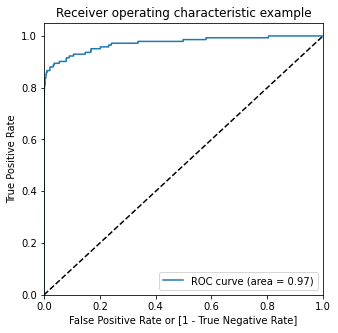

In [ ]:
#plot ROC Curve
draw_roc(y_test,y_test_pred_rf_prod_os)

<H4> XGBoost </H4>

In [ ]:
# Kfolds and Hyperparameter Turning for XGBoost

folds = StratifiedKFold(n_splits= 3, random_state=0, shuffle=True) 

#parameter initialisation
param_grid = {'learning_rate': [0.05, 0.1, 0.2, 0.3], 
             'subsample': [0.3, 0.6, 0.9],
              'n_estimators':[200,500,700,1000]
              }

#model specification
xgboost_model = XGBClassifier(objective='binary:logistic',random_state=0,max_depth=2)

# set up RondomizedSearchCV()
model_cv = RandomizedSearchCV(estimator = xgboost_model, 
                        param_distributions = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1,
                        return_train_score=True)  


#fit the model
model_cv.fit(X_train_os,y_train_os)
     

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=XGBClassifier(max_depth=2), n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.3],
                                        'n_estimators': [200, 500, 700, 1000],
                                        'subsample': [0.3, 0.6, 0.9]},
                   return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,591.364179,5.661530,4.087419,0.013625,0.9,1000,0.3,"{'subsample': 0.9, 'n_estimators': 1000, 'lear...",0.999997,0.999985,0.999996,0.999993,0.000005,1,1.000000,1.000000,1.000000,1.000000,0.000000
1,593.343919,6.311144,3.961435,0.024005,0.6,1000,0.05,"{'subsample': 0.6, 'n_estimators': 1000, 'lear...",0.999920,0.999951,0.999979,0.999950,0.000024,7,0.999970,0.999971,0.999962,0.999968,0.000004
2,177.525374,1.244519,0.895934,0.004348,0.9,200,0.3,"{'subsample': 0.9, 'n_estimators': 200, 'learn...",0.999936,0.999961,0.999982,0.999960,0.000019,6,0.999974,0.999987,0.999980,0.999981,0.000005
3,282.370350,1.431910,2.088887,0.018799,0.3,500,0.3,"{'subsample': 0.3, 'n_estimators': 500, 'learn...",0.999994,0.999984,0.999998,0.999992,0.000006,2,1.000000,1.000000,1.000000,1.000000,0.000000
4,87.528025,0.565047,0.829125,0.004269,0.3,200,0.05,"{'subsample': 0.3, 'n_estimators': 200, 'learn...",0.998771,0.998861,0.998881,0.998838,0.000048,10,0.998856,0.998838,0.998856,0.998850,0.000009
5,217.555284,1.735603,2.063224,0.011558,0.3,500,0.2,"{'subsample': 0.3, 'n_estimators': 500, 'learn...",0.999984,0.999979,0.999992,0.999985,0.000005,4,1.000000,1.000000,1.000000,1.000000,0.000000
6,303.679076,3.415978,2.860352,0.016638,0.3,700,0.1,"{'subsample': 0.3, 'n_estimators': 700, 'learn...",0.999965,0.999971,0.999990,0.999976,0.000010,5,0.999987,0.999995,0.999991,0.999991,0.000003
7,231.656586,18.981646,1.519529,0.004154,0.6,500,0.05,"{'subsample': 0.6, 'n_estimators': 500, 'learn...",0.999744,0.999849,0.999849,0.999814,0.000050,9,0.999834,0.999832,0.999813,0.999826,0.000010
8,193.719042,17.313244,1.548319,0.005589,0.6,500,0.1,"{'subsample': 0.6, 'n_estimators': 500, 'learn...",0.999919,0.999952,0.999979,0.999950,0.000025,8,0.999973,0.999970,0.999960,0.999968,0.000005
9,298.183237,21.367344,3.142419,0.017686,0.3,1000,0.2,"{'subsample': 0.3, 'n_estimators': 1000, 'lear...",0.999995,0.999984,0.999994,0.999991,0.000005,3,1.000000,1.000000,1.000000,1.000000,0.000000


In [ ]:
#printing the best model params
print(model_cv.best_params_)

{'subsample': 0.9, 'n_estimators': 1000, 'learning_rate': 0.3}


In [ ]:
# initiating the model and fit the model
params = {'subsample': 0.9, 'n_estimators': 1000, 'learning_rate': 0.3,'objective':'binary:logistic','max_depth':2}

#fit the model on training data
xgboost_model_os = XGBClassifier(params= params)
xgboost_model_os.fit(X_train_os,y_train_os)


XGBClassifier(params={'learning_rate': 0.3, 'max_depth': 2,
                      'n_estimators': 1000, 'objective': 'binary:logistic',
                      'subsample': 0.9})

In [ ]:
# Predictions on the train set
y_test_pred_xgb_os = xgboost_model_os.predict(X_test)

In [ ]:
# confusion metrics and classification report 
confusion_matrix_stats(y_test,y_test_pred_xgb_os)

[[84553   423]
 [   21   121]]


##################################################
Accuracy:- 0.9948
Sensitivity:- 0.8521
Specificity:- 0.995
F1-Score:- 0.3527696793002915
##################################################


**********Classification Report**********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.22      0.85      0.35       142

    accuracy                           0.99     85118
   macro avg       0.61      0.92      0.68     85118
weighted avg       1.00      0.99      1.00     85118



In [ ]:
#prediction probability
y_test_pred_xgb_prod_os = xgboost_model_os.predict_proba(X_test)[:,1]

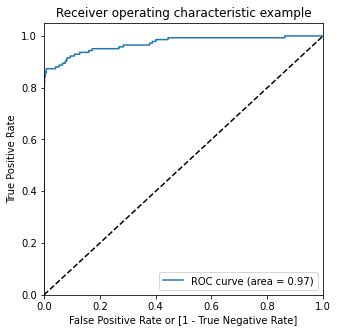

In [ ]:
#plot ROC Curve
draw_roc(y_test,y_test_pred_xgb_prod_os)

<H4> KNN Algorithm</H4>

In [ ]:
# Kfolds and Hyperparameter Turning for XGBoost
folds = StratifiedKFold(n_splits= 3, random_state=0, shuffle=True) 

params = {'n_neighbors' : list(range(3,15,2))} 

#initiate the model
KNN_Model = KNeighborsClassifier()

#RandomizedSearchCV
model_cv_os = RandomizedSearchCV(estimator = KNN_Model, 
                           param_distributions=params,
                           scoring = 'roc_auc', 
                           cv = folds,
                           n_jobs = -1,
                           n_iter = 10
                           )

#fitting the model
model_cv_os.fit(X_train_os,y_train_os)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': [3, 5, 7, 9, 11, 13]},
                   scoring='roc_auc')

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv_os.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.112584,0.006511,758.700081,4.206013,3,{'n_neighbors': 3},0.999811,0.999856,0.999932,0.999866,0.00005,1
1,0.109863,0.002920,835.347796,16.344336,5,{'n_neighbors': 5},0.999811,0.999856,0.999932,0.999866,0.00005,5
2,0.116771,0.009971,836.317929,15.161675,7,{'n_neighbors': 7},0.999811,0.999856,0.999932,0.999866,0.00005,1
3,0.147133,0.001148,840.484685,16.270479,9,{'n_neighbors': 9},0.999811,0.999856,0.999932,0.999866,0.00005,1
4,0.106354,0.026060,565.520453,10.313483,11,{'n_neighbors': 11},0.999811,0.999856,0.999932,0.999866,0.00005,5
5,0.104909,0.031498,543.401951,7.353533,13,{'n_neighbors': 13},0.999811,0.999856,0.999932,0.999866,0.00005,1


In [ ]:
#printing the best model params
print(model_cv_os.best_params_)

best_param = model_cv_os.best_params_

{'n_neighbors': 3}


In [ ]:
#fit the model on training data
KNN_model_os = KNeighborsClassifier(n_neighbors= 3)
KNN_model_os.fit(X_train_os,y_train_os)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Predictions on the train set
y_test_pred_knn_os = KNN_model_os.predict(X_test)

In [ ]:
# confusion metrics and classification report 
confusion_matrix_stats(y_test,y_test_pred_knn_os)

[[84946    30]
 [   34   108]]


##################################################
Accuracy:- 0.9992
Sensitivity:- 0.7606
Specificity:- 0.9996
F1-Score:- 0.7714285714285714
##################################################


**********Classification Report**********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.78      0.76      0.77       142

    accuracy                           1.00     85118
   macro avg       0.89      0.88      0.89     85118
weighted avg       1.00      1.00      1.00     85118



In [ ]:
#prediction probability
y_test_pred_knn_prod_os = KNN_model_os.predict_proba(X_test)[:,1]

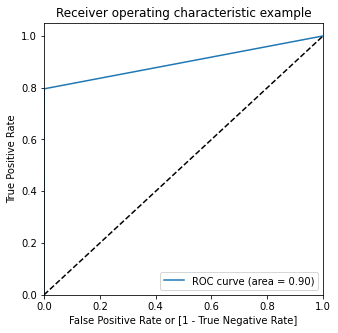

In [ ]:
#plot ROC Curve
draw_roc(y_test,y_test_pred_knn_prod_os)

<H3> Model building with SMOTE(Synthetic Minority Oversampling Technique </H3>

In [ ]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
# Instantiate SMOTE
smote = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (198608, 30)
After SMOTE oversampling X_train shape= (396554, 30)


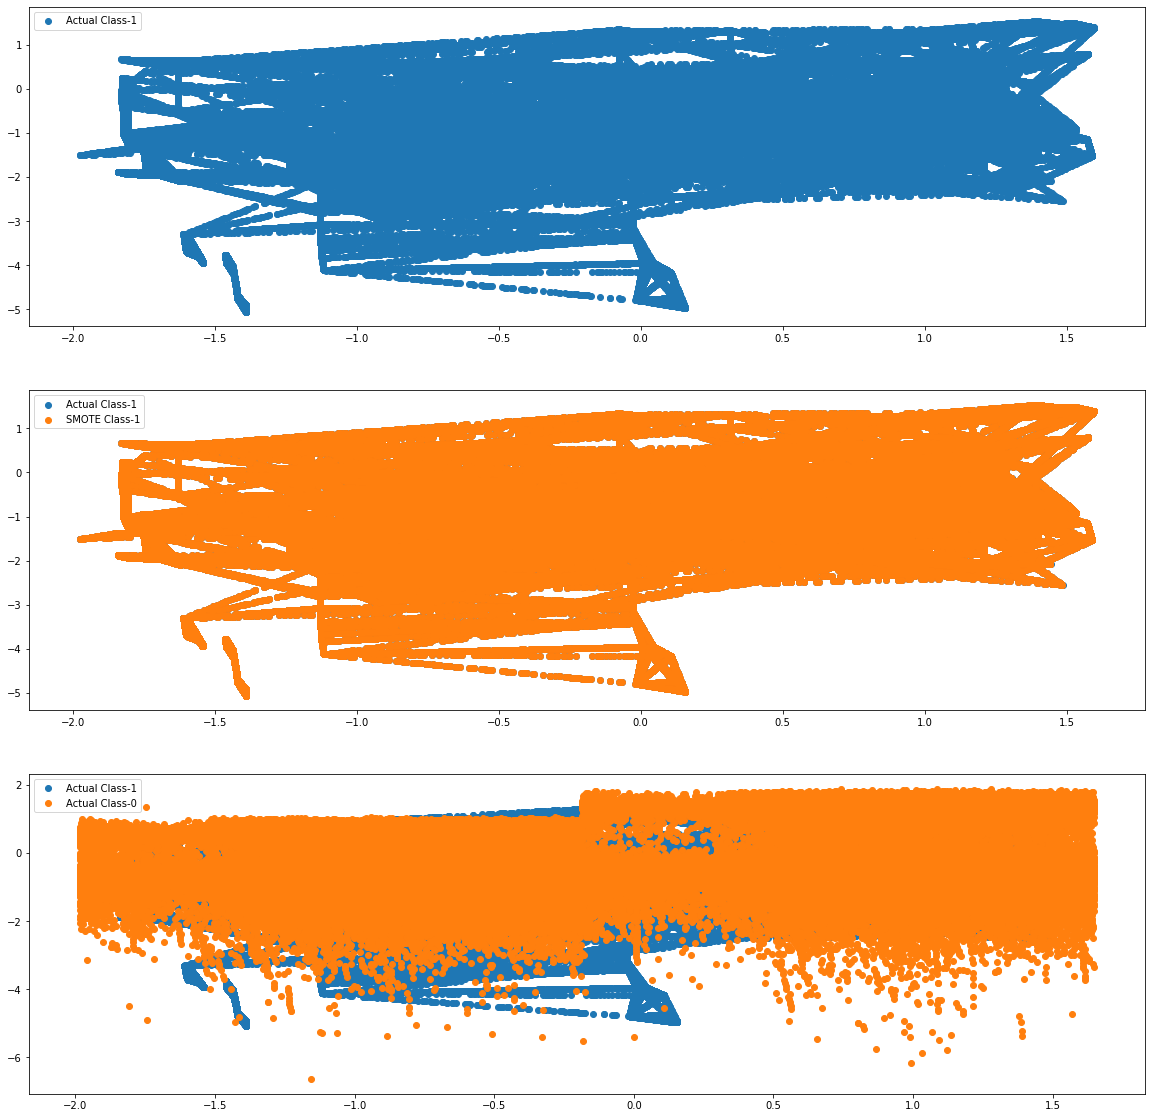

In [ ]:
#Plot distribution

X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train_smote[np.where(y_train_smote==1.0)]
X_train_0 = X_train_smote[np.where(y_train_smote==0.0)]

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='SMOTE Class-1')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0')
plt.legend()

<H4> Logistic Regression </H4>

In [ ]:
#creating Kfolds
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000],"solver":['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear']}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv_lr_smote = RandomizedSearchCV(estimator = LogisticRegression(),
                        param_distributions = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1
                        ) 

# Fit the model
model_cv_lr_smote.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
                   estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100, 1000],
                                        'solver': ['newton-cg', 'lbfgs', 'sag',
                                                   'saga', 'liblinear']},
                   scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv_lr_smote.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.782156,0.080102,0.052913,0.020916,liblinear,0.1,"{'solver': 'liblinear', 'C': 0.1}",0.991499,0.990825,0.991179,0.991394,0.990949,0.991169,0.000255,10
1,2.293111,0.353197,0.046584,0.017102,lbfgs,10,"{'solver': 'lbfgs', 'C': 10}",0.991506,0.990831,0.991183,0.991397,0.990953,0.991174,0.000256,2
2,22.920137,2.560632,0.030615,0.001622,saga,1000,"{'solver': 'saga', 'C': 1000}",0.991506,0.990831,0.991183,0.991397,0.990953,0.991174,0.000256,4
3,22.388162,1.367840,0.039722,0.015534,saga,100,"{'solver': 'saga', 'C': 100}",0.991506,0.990831,0.991183,0.991397,0.990953,0.991174,0.000256,5
4,1.775298,0.312090,0.031146,0.002938,lbfgs,100,"{'solver': 'lbfgs', 'C': 100}",0.991506,0.990831,0.991183,0.991397,0.990953,0.991174,0.000256,1
5,1.995289,0.149386,0.045160,0.016379,lbfgs,0.1,"{'solver': 'lbfgs', 'C': 0.1}",0.991499,0.990826,0.991179,0.991394,0.990948,0.991169,0.000255,9
6,6.571046,0.731546,0.036712,0.009668,sag,100,"{'solver': 'sag', 'C': 100}",0.991506,0.990831,0.991183,0.991397,0.990953,0.991174,0.000256,3
7,3.526217,0.331960,0.035142,0.002092,liblinear,100,"{'solver': 'liblinear', 'C': 100}",0.991505,0.990830,0.991182,0.991397,0.990951,0.991173,0.000256,7
8,8.765734,0.267310,0.036787,0.001305,newton-cg,1,"{'solver': 'newton-cg', 'C': 1}",0.991506,0.990831,0.991182,0.991397,0.990952,0.991174,0.000256,6
9,3.769527,0.400028,0.032564,0.005504,liblinear,1,"{'solver': 'liblinear', 'C': 1}",0.991504,0.990829,0.991181,0.991397,0.990950,0.991172,0.000256,8


In [ ]:
# checking the best score model with better c
best_score_lr = model_cv_lr_smote.best_score_
best_C_lr = model_cv_lr_smote.best_params_['C']
best_solver_lr = model_cv_lr_smote.best_params_['solver']

#Print the result
print("the highest roc_auc score is {0} at C = {1} and solver is {2}".format(best_score_lr,best_C_lr,best_solver_lr))

the highest roc_auc score is 0.9911741355474458 at C = 100 and solver is lbfgs


In [ ]:
# predicting the model with above metrics
lr_smote = LogisticRegression(C=best_C_lr,solver=best_solver_lr)

#fitting the model on train data

y_train_pred_lr_smote = lr_smote.fit(X_train_smote,y_train_smote)

In [ ]:
y_test_pred_lr_smote = lr_smote.predict(X_test)

In [ ]:
# confusion metrics and classification report 
confusion_matrix_stats(y_test,y_test_pred_lr_smote)

[[82324  2652]
 [   16   126]]


##################################################
Accuracy:- 0.9687
Sensitivity:- 0.8873
Specificity:- 0.9688
F1-Score:- 0.0863013698630137
##################################################


**********Classification Report**********
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     84976
           1       0.05      0.89      0.09       142

    accuracy                           0.97     85118
   macro avg       0.52      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118



In [ ]:
#prediction probability
y_test_pred_lr_prod_smote = lr_smote.predict_proba(X_test)[:,1]

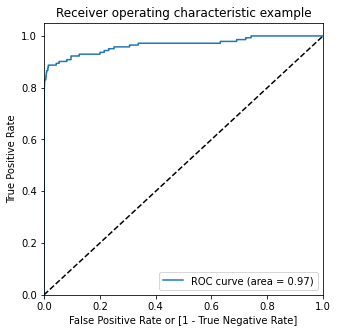

In [ ]:
draw_roc(y_test,y_test_pred_lr_prod_smote)

<H4> Decision Tree </H4>

In [ ]:
#creating param grid 
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

param_grid = {
    'max_depth': range(3, 10, 1),
    'min_samples_leaf': [1,2,4,10,20,30],                 ## Hyperparameter: min_samples_leaf to be tuned
     'criterion': ['gini','entropy'],                                     
    'min_samples_split':[2,3,5,10,20,30,50]
}

#Initiating Decision Tree
DTree = DecisionTreeClassifier()

grid_search_dt_smote = RandomizedSearchCV(estimator=DTree,
                              param_distributions=param_grid,
                              scoring='roc_auc',
                              cv=folds,
                              n_jobs = -1,
                              verbose=1)


#fitting the grid search to data
grid_search_dt_smote.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(3, 10),
                                        'min_samples_leaf': [1, 2, 4, 10, 20,
                                                             30],
                                        'min_samples_split': [2, 3, 5, 10, 20,
                                                              30, 50]},
                   scoring='roc_auc', verbose=1)

In [ ]:
#cv results
cv_results_dt = pd.DataFrame(grid_search_dt_smote.cv_results_)
cv_results_dt

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,9.439229,0.078332,0.055824,0.002062,20,1,5,gini,"{'min_samples_split': 20, 'min_samples_leaf': ...",0.987931,0.988281,0.987151,0.987788,0.000472,7
1,10.012810,0.109337,0.055278,0.000518,30,30,4,entropy,"{'min_samples_split': 30, 'min_samples_leaf': ...",0.984770,0.984968,0.984740,0.984826,0.000101,8
2,7.706180,0.050041,0.053671,0.001093,50,20,3,entropy,"{'min_samples_split': 50, 'min_samples_leaf': ...",0.975407,0.975833,0.975961,0.975734,0.000237,10
3,15.545447,0.281098,0.062535,0.004323,5,30,7,entropy,"{'min_samples_split': 5, 'min_samples_leaf': 3...",0.996919,0.996867,0.996841,0.996875,0.000032,2
4,14.265617,0.039717,0.059042,0.001342,30,20,8,gini,"{'min_samples_split': 30, 'min_samples_leaf': ...",0.996668,0.996370,0.996195,0.996411,0.000195,3
5,15.429075,0.213756,0.054338,0.009773,5,20,7,entropy,"{'min_samples_split': 5, 'min_samples_leaf': 2...",0.996920,0.996892,0.996852,0.996888,0.000028,1
6,14.054091,0.168930,0.057152,0.001308,10,10,6,entropy,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.994608,0.994661,0.994804,0.994691,0.000083,4
7,10.989965,0.238311,0.052312,0.008827,3,10,6,gini,"{'min_samples_split': 3, 'min_samples_leaf': 1...",0.992151,0.992426,0.991597,0.992058,0.000345,6
8,7.748398,0.239464,0.037470,0.000182,20,4,4,entropy,"{'min_samples_split': 20, 'min_samples_leaf': ...",0.984739,0.984968,0.984738,0.984815,0.000108,9
9,9.604211,0.130549,0.039256,0.000359,30,1,7,gini,"{'min_samples_split': 30, 'min_samples_leaf': ...",0.994601,0.994792,0.994179,0.994524,0.000256,5


In [ ]:
#printing optimal score and hyperparameters
print("Best ROC AUC Score: ",grid_search_dt_smote.best_score_)
print(grid_search_dt_smote.best_estimator_)
best_estimator_dt = grid_search_dt_smote.best_estimator_

Best ROC AUC Score:  0.9968880189911102
DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=20,
                       min_samples_split=5)


In [ ]:
#Model with best estimators
dt_model_smote = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=5,min_samples_leaf=20)

dt_model_smote.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=20,
                       min_samples_split=5)

In [ ]:
#Predicting on test data
y_train_pred_dt_smote = dt_model_smote.predict(X_test)

In [ ]:
# confusion metrics and classification report 
confusion_matrix_stats(y_test,y_train_pred_dt_smote)

[[82616  2360]
 [   21   121]]


##################################################
Accuracy:- 0.972
Sensitivity:- 0.8521
Specificity:- 0.9722
F1-Score:- 0.09226077011056043
##################################################


**********Classification Report**********
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84976
           1       0.05      0.85      0.09       142

    accuracy                           0.97     85118
   macro avg       0.52      0.91      0.54     85118
weighted avg       1.00      0.97      0.98     85118



In [ ]:
#prediction probability
y_test_pred_dt_prod_smote = dt_model_smote.predict_proba(X_test)[:,1]

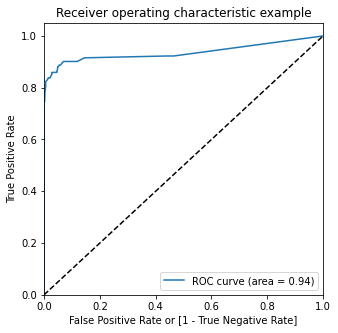

In [ ]:
#plot ROC Curve
draw_roc(y_test,y_test_pred_dt_prod_smote)

<H4> Random Forest </H4>

In [ ]:
# Kfold and Params Turning for Random Forest
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

#Params
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20],
    'criterion': ['gini','entropy']
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search_smote = RandomizedSearchCV(estimator = rf, 
                           param_distributions=param_grid,
                           scoring = 'roc_auc', 
                           cv = folds,
                           n_jobs = -1,
                           verbose = 5)

# Fit the model
grid_search_smote.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(5, 10, 5),
                                        'max_features': [10, 20],
                                        'min_samples_leaf': range(50, 150, 50),
                                        'min_samples_split': range(50, 150, 50),
                                        'n_estimators': [100, 200, 300]},
                   scoring='roc_auc', verbose=5)

In [ ]:
#printing the optimal score and hyperperameters
print('We can get accuracy of',grid_search_smote.best_score_,'using',grid_search_smote.best_params_)

We can get accuracy of 0.995578838259147 using {'n_estimators': 300, 'min_samples_split': 50, 'min_samples_leaf': 50, 'max_features': 20, 'max_depth': 5, 'criterion': 'entropy'}


In [ ]:
#creating a model with best hyperparameters
rf_model_smote = RandomForestClassifier(**grid_search_smote.best_params_)

In [ ]:
#fitting the model
rf_model_smote.fit(X_train_smote,y_train_smote)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=20,
                       min_samples_leaf=50, min_samples_split=50,
                       n_estimators=300)

In [ ]:
#predicting the model
y_test_pred_rf_smote = rf_model_smote.predict(X_test)

In [ ]:
# confusion metrics and classification report 
confusion_matrix_stats(y_test,y_test_pred_rf_smote)

[[84057   919]
 [   21   121]]


##################################################
Accuracy:- 0.989
Sensitivity:- 0.8521
Specificity:- 0.9892
F1-Score:- 0.20473773265651438
##################################################


**********Classification Report**********
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     84976
           1       0.12      0.85      0.20       142

    accuracy                           0.99     85118
   macro avg       0.56      0.92      0.60     85118
weighted avg       1.00      0.99      0.99     85118



In [ ]:
#prediction probability
y_test_pred_rf_prod_smote = rf_model_smote.predict_proba(X_test)[:,1]

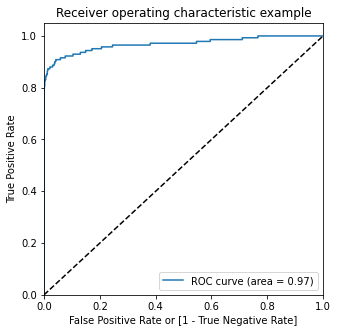

In [ ]:
#plot ROC Curve
draw_roc(y_test,y_test_pred_rf_prod_smote)

<H4> XGBoost </H4>

In [ ]:
# Kfolds and Hyperparameter Turning for XGBoost

folds = StratifiedKFold(n_splits= 3, random_state=0, shuffle=True) 

#parameter initialisation
param_grid = {'learning_rate': [0.05, 0.1, 0.2, 0.3], 
             'subsample': [0.3, 0.6, 0.9],
              'n_estimators':[200,500,700,1000]
              }

#model specification
xgboost_model = XGBClassifier(objective='binary:logistic',random_state=0,max_depth=2)

# set up RondomizedSearchCV()
model_cv = RandomizedSearchCV(estimator = xgboost_model, 
                        param_distributions = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs = -1,
                        n_iter = 10)  


#fit the model
model_cv.fit(X_train_smote,y_train_smote)
     

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=XGBClassifier(max_depth=2), n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.3],
                                        'n_estimators': [200, 500, 700, 1000],
                                        'subsample': [0.3, 0.6, 0.9]},
                   scoring='roc_auc')

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,128.128587,0.406327,0.883870,0.004229,0.6,200,0.3,"{'subsample': 0.6, 'n_estimators': 200, 'learn...",0.999879,0.999930,0.999936,0.999915,0.000026,6
1,707.310109,5.450797,3.559341,0.089906,0.9,1000,0.1,"{'subsample': 0.9, 'n_estimators': 1000, 'lear...",0.999961,0.999961,0.999979,0.999967,0.000008,2
2,494.550610,4.245237,2.836915,0.013396,0.9,700,0.2,"{'subsample': 0.9, 'n_estimators': 700, 'learn...",0.999982,0.999973,0.999989,0.999982,0.000007,1
3,142.207113,0.448800,0.891874,0.007848,0.9,200,0.3,"{'subsample': 0.9, 'n_estimators': 200, 'learn...",0.999895,0.999915,0.999923,0.999911,0.000012,7
4,443.053720,2.414742,2.822500,0.023313,0.6,700,0.1,"{'subsample': 0.6, 'n_estimators': 700, 'learn...",0.999920,0.999944,0.999958,0.999941,0.000016,4
5,96.686330,0.931014,0.902658,0.002535,0.3,200,0.3,"{'subsample': 0.3, 'n_estimators': 200, 'learn...",0.999890,0.999930,0.999945,0.999921,0.000023,5
6,353.955955,2.460316,2.051136,0.021128,0.9,500,0.1,"{'subsample': 0.9, 'n_estimators': 500, 'learn...",0.999835,0.999866,0.999880,0.999860,0.000019,8
7,285.644497,1.329199,2.187662,0.006334,0.3,700,0.1,"{'subsample': 0.3, 'n_estimators': 700, 'learn...",0.999925,0.999948,0.999964,0.999946,0.000016,3
8,129.690500,0.636482,0.829400,0.007938,0.6,200,0.05,"{'subsample': 0.6, 'n_estimators': 200, 'learn...",0.997028,0.997158,0.997153,0.997113,0.000060,10
9,122.206786,2.408017,0.659306,0.003488,0.6,200,0.2,"{'subsample': 0.6, 'n_estimators': 200, 'learn...",0.999737,0.999782,0.999818,0.999779,0.000033,9


In [ ]:
#printing the best model params
print(model_cv.best_params_)

{'subsample': 0.9, 'n_estimators': 700, 'learning_rate': 0.2}


In [ ]:
#fit the model on training data
xgboost_model_smote = XGBClassifier(**model_cv.best_params_)
xgboost_model_smote.fit(X_train_smote,y_train_smote)

XGBClassifier(learning_rate=0.2, n_estimators=700, subsample=0.9)

In [ ]:
# Predictions on the train set
y_test_pred_xgb_smote = xgboost_model_smote.predict(X_test)

In [ ]:
# confusion metrics and classification report 
confusion_matrix_stats(y_test,y_test_pred_xgb_smote)

[[84947    29]
 [   34   108]]


##################################################
Accuracy:- 0.9993
Sensitivity:- 0.7606
Specificity:- 0.9997
F1-Score:- 0.7741935483870969
##################################################


**********Classification Report**********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.79      0.76      0.77       142

    accuracy                           1.00     85118
   macro avg       0.89      0.88      0.89     85118
weighted avg       1.00      1.00      1.00     85118



In [ ]:
#prediction probability
y_test_pred_xgb_prod_smote = xgboost_model_smote.predict_proba(X_test)[:,1]

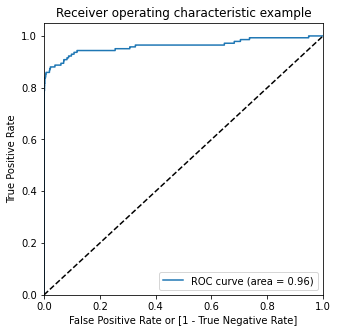

In [ ]:
#plot ROC Curve
draw_roc(y_test,y_test_pred_xgb_prod_smote)

<H4> KNN Model </H4>

In [ ]:
# Kfolds and Hyperparameter Turning for XGBoost
folds = StratifiedKFold(n_splits= 3, random_state=0, shuffle=True) 

params = {'n_neighbors' : list(range(3,15,3))} 

#initiate the model
KNN_Model = KNeighborsClassifier()

#RandomizedSearchCV
model_cv = RandomizedSearchCV(estimator = KNN_Model, 
                           param_distributions=params,
                           scoring = 'roc_auc', 
                           cv = folds,
                           n_jobs = -1,
                           verbose = 1
                           )

#fitting the model
model_cv.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': [3, 6, 9, 12]},
                   scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.095838,0.019834,727.026737,1.275467,3,{'n_neighbors': 3},0.999554,0.999652,0.999735,0.999647,0.000074,4
1,0.065826,0.001164,802.008820,7.658981,6,{'n_neighbors': 6},0.999569,0.999660,0.999735,0.999655,0.000068,3
2,0.089773,0.019762,798.593565,6.682107,9,{'n_neighbors': 9},0.999584,0.999660,0.999743,0.999662,0.000065,2
3,0.095359,0.007351,786.666240,11.564958,12,{'n_neighbors': 12},0.999591,0.999690,0.999765,0.999682,0.000071,1


In [ ]:
#printing the best model params
print(model_cv.best_params_)

{'n_neighbors': 12}


In [ ]:
#fit the model on training data
KNN_model_smote = KNeighborsClassifier(**model_cv.best_params_)
KNN_model_smote.fit(X_train_smote,y_train_smote)

KNeighborsClassifier(n_neighbors=12)

In [ ]:
# Predictions on the train set
y_test_pred_knn_smote = KNN_model_smote.predict(X_test)

In [ ]:
# confusion metrics and classification report 
confusion_matrix_stats(y_test,y_test_pred_knn_smote)

[[84696   280]
 [   25   117]]


##################################################
Accuracy:- 0.9964
Sensitivity:- 0.8239
Specificity:- 0.9967
F1-Score:- 0.4341372912801484
##################################################


**********Classification Report**********
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.29      0.82      0.43       142

    accuracy                           1.00     85118
   macro avg       0.65      0.91      0.72     85118
weighted avg       1.00      1.00      1.00     85118



In [ ]:
#prediction probability
y_test_pred_knn_prod_smote = KNN_model_smote.predict_proba(X_test)[:,1]

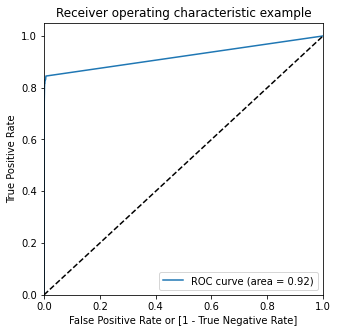

In [ ]:
#plot ROC Curve
draw_roc(y_test,y_test_pred_knn_prod_smote)

**Observation**

After modeling with Imbalanced Power Transformed data and observed below stats as per below.

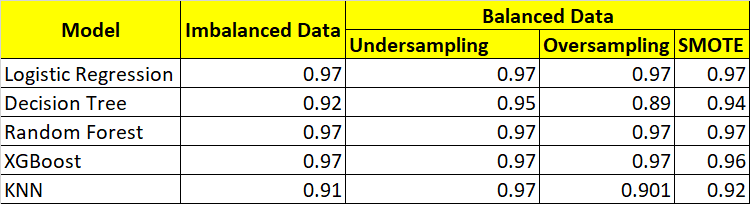

After considering all the above stats we can see Logistic Regression have done consistently better when comapred to all other model.

Though the efficiency and ease of running the models are faster in Undersampling but we are loosing information which is not advisible given the data split is less for above data.

Then we consider working with Oversampling and SMOTE technique among them logistic regression has performed really well with ROC Score of 0.97 and it is consistent in all the three models.

The other adavantage of choosing logistic regression is its ease of use in terms of resources and hardware.

Top var = 5
2nd Top var = 12
3rd Top var = 2


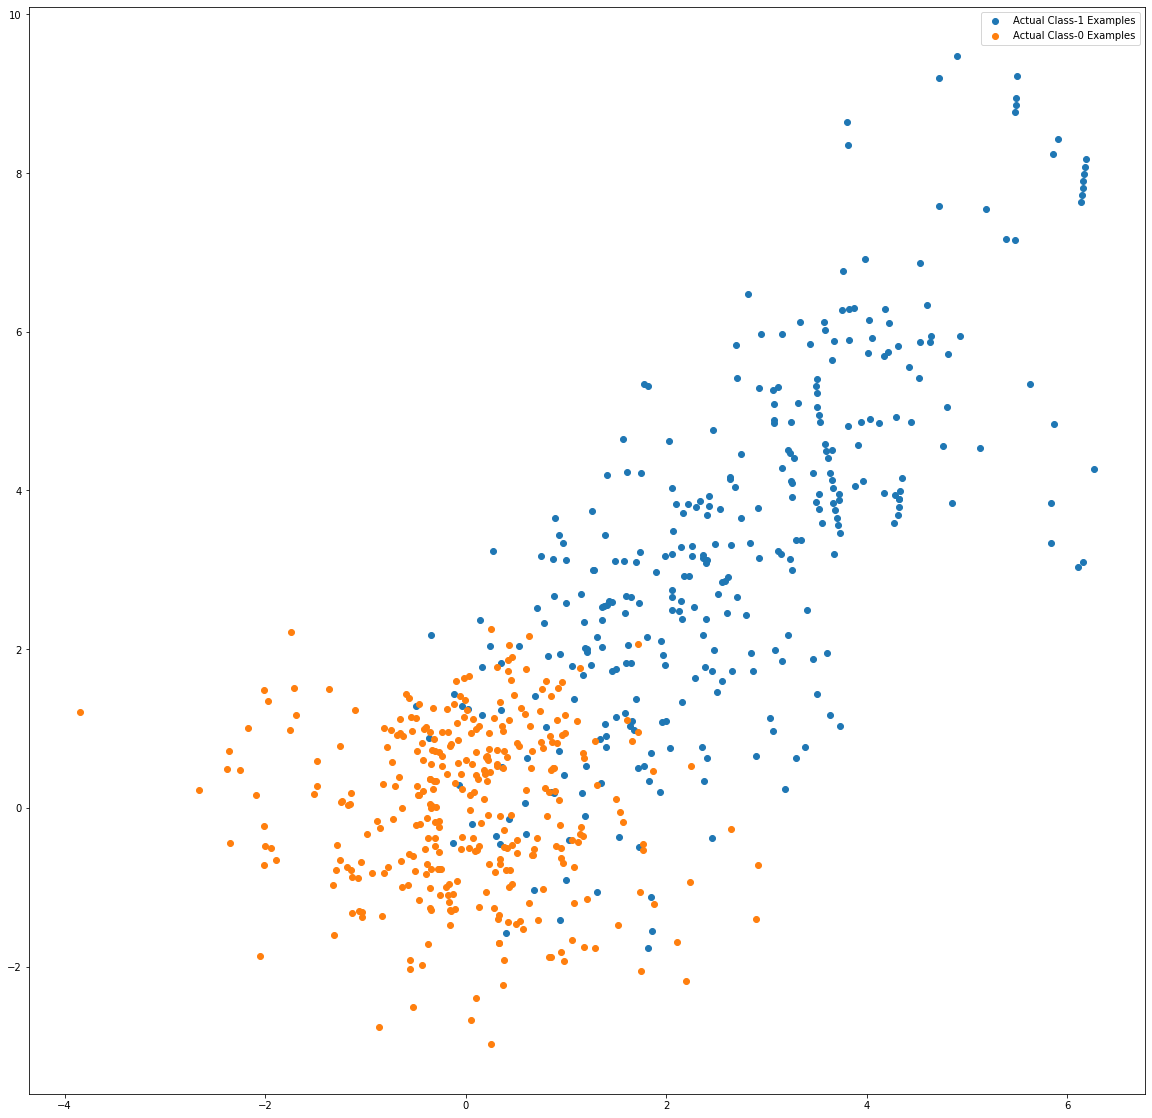

In [ ]:
var_imp = []
for i in lr_smote.coef_[0]:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(lr_smote.coef_[0])[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(lr_smote.coef_[0])[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(lr_smote.coef_[0])[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(lr_smote.coef_[0])[-1])
second_top_var_index = var_imp.index(np.sort(lr_smote.coef_[0])[-2])

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
              label='Actual Class-0 Examples')
plt.legend()
plt.show()


In [ ]:
print('Test auc =', metrics.roc_auc_score(y_test, y_test_pred_lr_prod_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_lr_prod_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Test auc = 0.9652903653326473
Threshold= 0.694751201563053


For banks with smaller average transaction value, we need high precision as we only need to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, we can add human element to verifing transaction with customer. In case if the precision is low it becomses difficult for the bank as it involves lot of human intervention.

For banks having larger transaction value, if the recall is low, then it will not be able to label as fraudlent so we need to consider losses as primary factor to not missed transaction with a high-value.In order to save the banks from high-value fraudulent transactions, we have to focus on a high recall

After performing several models, we have seen that in the balanced dataset with SMOTE technique the simplest Logistic regression model has good ROC score and also high Recall. Hence, we can go with the logistic model. It is also easier to interpret and explain to the business.